In [47]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sea
# Retina mode
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [48]:
from google.colab import drive
drive.mount('/content/drive')

# Use the correct path to your file in Drive
file_path = "/content/drive/My Drive/Data_copy.csv"
df1 = pd.read_csv(file_path)
df1

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,Timestamp,station,PM2.5,PM10,address,city,latitude,longitude,state
0,2017-01-01,"32Bungalows, Bhilai - CECB",NaN,NaN,"Bhilai RO Office, 5, 32 Bungalows, Bhilai, Dis...",Bhilai,21.194815,81.314770,Chhattisgarh
1,2017-01-01,"AIIMS, Raipur - CECB",NaN,NaN,"All India Institute Of Medical Science, Gate N...",Raipur,21.258815,81.578979,Chhattisgarh
2,2017-01-01,"Adarsh Nagar, Jaipur - RSPCB",NaN,NaN,"Psychiatric Centre, Janta Colony, Govind Marg,...",Jaipur,26.902909,75.836858,Rajasthan
3,2017-01-01,"Airoli, Navi Mumbai - MPCB",NaN,54.743723,NaN,Navi Mumbai,19.149400,72.998600,Maharashtra
4,2017-01-01,"Airport Area, Indore - IMC",NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
1627456,2024-12-10,"Worli, Mumbai - MPCB",54.71,124.420000,"89-B, NEERI Building, Dr. Annie Besant Road, W...",Mumbai,18.993616,72.812811,Maharashtra
1627457,2024-12-10,"Yamunapuram, Bulandshahr - UPPCB",53.23,101.340000,"F-5, Yamunapuram, Bulandshahr, Near MMR Mall (...",Bulandshahr,28.406963,77.849831,Uttar Pradesh
1627458,2024-12-10,"Yerramukkapalli, Kadapa - APPCB",75.00,110.750000,"Municipal Corporation Office Complex, Railway ...",Kadapa,14.465052,78.824187,Andhra Pradesh
1627459,2024-12-10,"Zero Point GICI, Gangtok - SSPCB",NaN,NaN,"Near State PWD Office, Zero Point, Gangtok, Si...",Gangtok,27.338530,88.614099,Sikkim


In [49]:
file_path = "/content/drive/My Drive/NCAP_Funding_copy.csv"
df2 = pd.read_csv(file_path)
df2.head()

,S. No.,State,City,Amount released during FY 2019-20,Amount released during FY 2020-21,Amount released during FY 2021-22,Total fund released,Utilisation as on June 2022
0,1,Andhra Pradesh,Vijaywada,6,-,-,6.00,22.91
1,2,Andhra Pradesh,Guntur,0.12,0.76,1.96,2.84,22.91
2,3,Andhra Pradesh,Kurnool,0.06,0.76,1.36,2.18,22.91
3,4,Andhra Pradesh,Nellore,0.06,0.76,1.92,2.74,22.91
4,5,Andhra Pradesh,Visakhapatnam,0.12,-,-,0.12,22.91


In [50]:
file_path = "/content/drive/My Drive/State_data_copy.csv"
df3 = pd.read_csv(file_path)
df3.head()

,State,Population,Area (km2)
0,Uttar Pradesh,199812341,240928
1,Maharashtra,112374333,307713
2,Bihar,104099452,94163
3,West Bengal,91276115,88752
4,Madhya Pradesh,72626809,308252


In [51]:
print(df1.shape)
print(df2.shape)
print(df3.shape)

(1627461, 9)
(117, 8)
(31, 3)


# 1. Spatial Aggregation

1. Which state (consider all stations in that state) has the highest average PM2.5 concentration across all stations and across all years?

In [71]:
highest_avg_pm25_state = df1.groupby('state')['PM2.5'].mean().idxmax()
print(f"The state with the highest average PM2.5 concentration is: {highest_avg_pm25_state}")

The state with the highest average PM2.5 concentration is: Delhi


2. Which state (consider all stations in that state) had the most days with hazardous PM2.5 levels (above 300 µg/m³) for the year 2023?

In [72]:
df1['Timestamp'] = pd.to_datetime(df1['Timestamp'])
df_year_2023 = df1[df1['Timestamp'].dt.year == 2023]
state_with_most_hazardous_days = df_year_2023[df_year_2023['PM2.5'] > 300].groupby('state')['Timestamp'].count().idxmax()
print(f"The state with the most days with hazardous PM2.5 levels in 2023 is: {state_with_most_hazardous_days}")

The state with the most days with hazardous PM2.5 levels in 2023 is: Delhi


3. Which state has the highest variability in PM2.5 levels across its monitoring stations in 2023?

In [73]:
highest_std_state = df_year_2023.groupby('state')['PM2.5'].std().idxmax()
print(f"The state with the highest variability in PM2.5 levels across its monitoring stations in 2023 is: {highest_std_state}")

The state with the highest variability in PM2.5 levels across its monitoring stations in 2023 is: Delhi


4. Which state has the lowest average PM2.5 levels during the Covid period (The year 2020-2021 both years inclusive)?

In [74]:
df_covid_yr = df1[(df1['Timestamp'].dt.year >= 2020) & (df1['Timestamp'].dt.year <= 2021)]
state_with_lowest_avg_pm = df_covid_yr.groupby('state')['PM2.5'].mean().idxmin()
print(f"The state with the lowest average PM2.5 levels during the Covid period is: {state_with_lowest_avg_pm}")

The state with the lowest average PM2.5 levels during the Covid period is: Mizoram


# Temporal Aggregation

1. Report the station that recorded the highest value of PM 2.5 for the month Aug of 2020.

In [75]:
df_aug_2020 = df1[(df1['Timestamp'].dt.year == 2020) & (df1['Timestamp'].dt.month == 8)]
station = df_aug_2020.groupby('station')['PM2.5'].max().idxmax()
print(f"The station that recorded the highest value of PM 2.5 for the month Aug of 2020 is: {station}")

The station that recorded the highest value of PM 2.5 for the month Aug of 2020 is: Lal Bahadur Shastri Nagar, Kalaburagi - KSPCB


2. For the year 2018, calculate the average PM2.5 concentration for each season (Seasons being Winter: December-February, Summer: March-May, and Monsoon: June-September) for stations Lal Bahadur Shastri Nagar, Kalaburagi - KSPCB. Identifying the season with the highest pollution.
[Thought Question] Can you suggest some potential factors on why certain seasons are generally more polluted than others?


In [123]:
df1['year'] = df1['Timestamp'].dt.year
data_2018 = df1[df1["year"] == 2018].copy()

data_2018['month'] = data_2018['Timestamp'].dt.month
data_2018['season'] = data_2018['month'].apply(lambda x: 'Winter' if x in [12, 1, 2] else ('Summer' if x in [3, 4, 5] else 'Monsoon'))

lal_bahadur = data_2018[data_2018['station'] == 'Lal Bahadur Shastri Nagar, Kalaburagi - KSPCB']
season_pm = lal_bahadur.groupby('season')['PM2.5'].mean().sort_values(ascending = False)
print(season_pm)

print(f"The season with the highest average PM2.5 concentration in 2018 for Lal Bahadur Shastri Nagar, Kalaburagi - KSPCB is {season_pm.index[0]} with {season_pm.iloc[0]}")

# Following are some potential factors on why certain seasons have higher pollution levels than others:

# Weather conditions: Certain seasons have weather conditions that are more conducive to air pollution.
# Agricultural activities: Monsoon season is generally more polluted due to increased agricultural activities like crop burning, which releases pollutants into the air.

season
Winter     67.492344
Monsoon    42.887399
Summer           NaN
Name: PM2.5, dtype: float64
The season with the highest average PM2.5 concentration in 2018 for Lal Bahadur Shastri Nagar, Kalaburagi - KSPCB is Winter with 67.4923443634478


3. Compare the average PM2.5 levels during weekends and weekdays for the station Lal Bahadur Shastri Nagar, Kalaburagi - KSPCB over the year 2021. Create a plot to show these trends Steps:
Calculate the monthly average PM2.5 for weekdays and weekends separately
X-axis: Months (January to December).
Y-axis: Average PM2.5 levels.
Use two lines: one for the monthly average PM2.5 levels on weekdays and one for weekends.

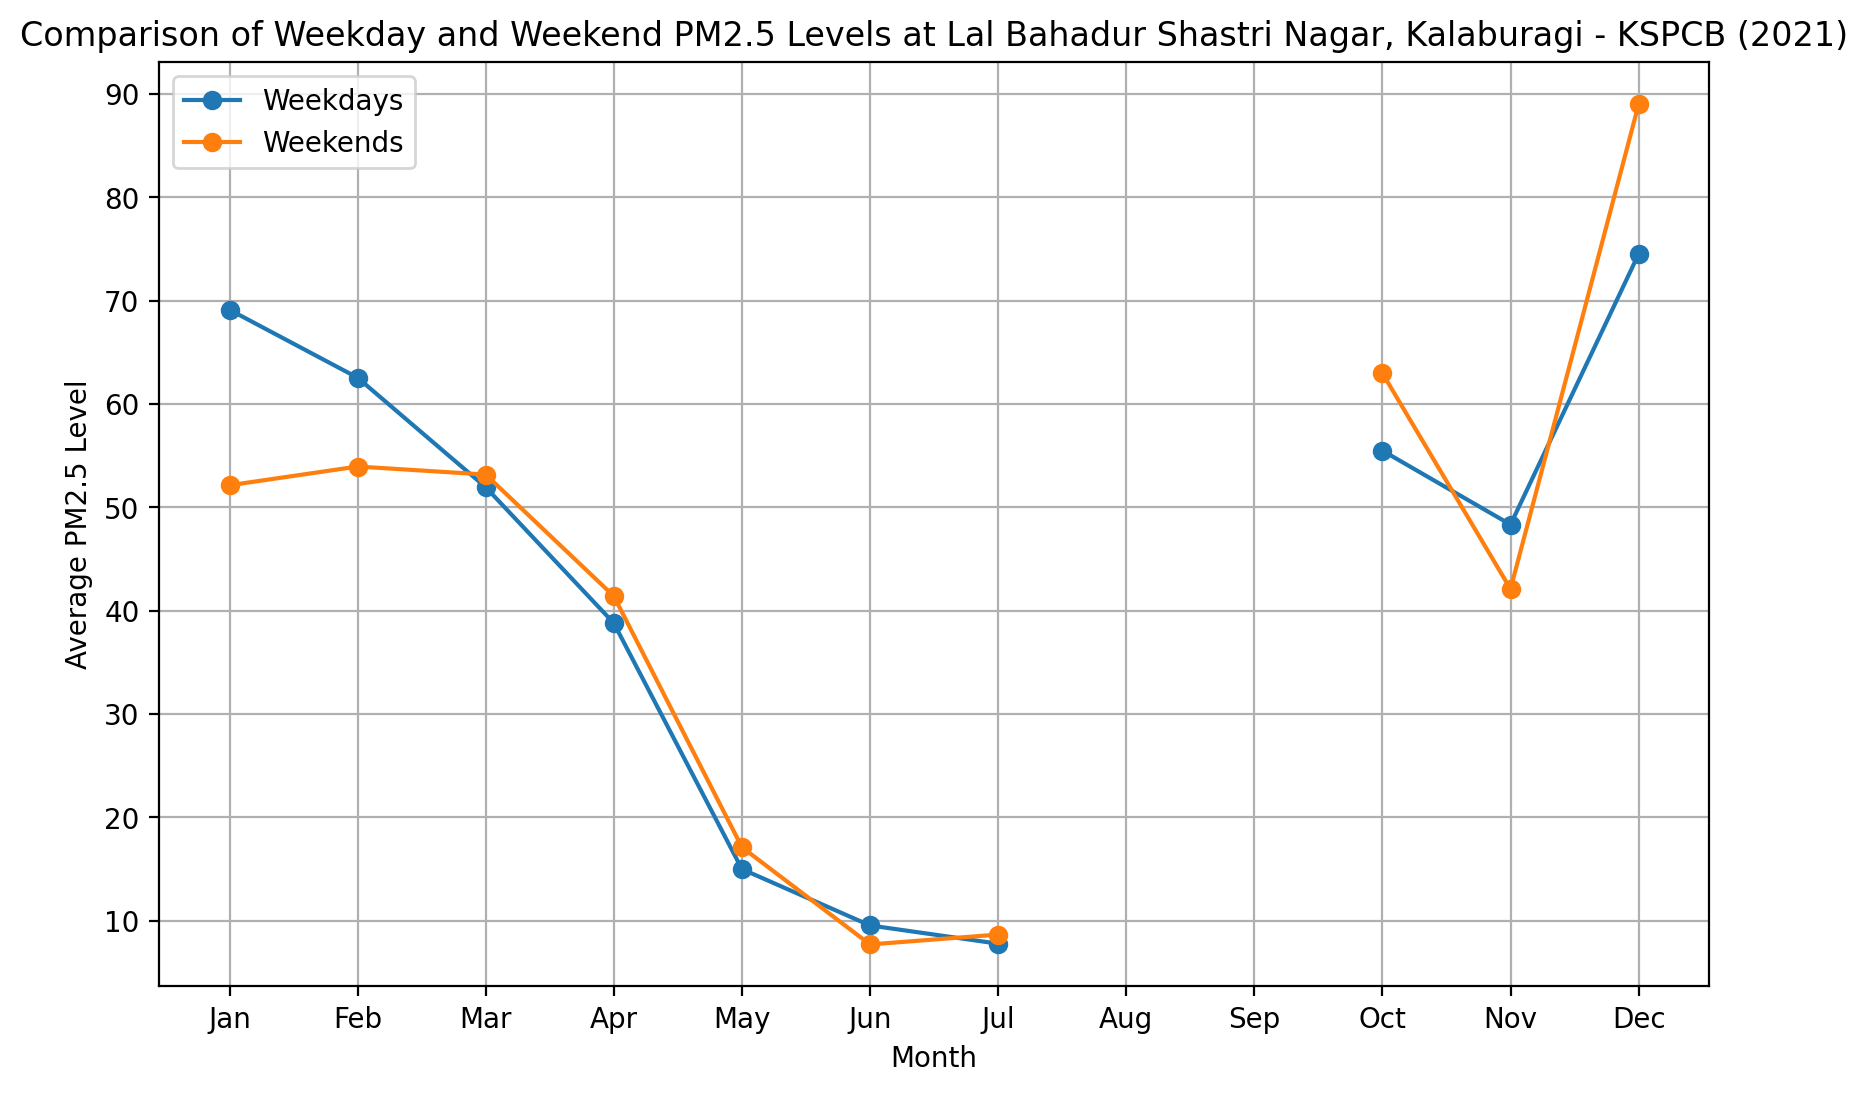

In [63]:
station_data = df1[(df1['station'] == 'Lal Bahadur Shastri Nagar, Kalaburagi - KSPCB')& (df1['Timestamp'].dt.year == 2021)]
weekday_avg = []
weekend_avg = []
months = range(1, 13)
for month in months:
    weekday_data = station_data[(station_data['Timestamp'].dt.month == month)& (station_data['Timestamp'].dt.dayofweek.isin([0, 1, 2, 3, 4]))]
    weekend_data = station_data[(station_data['Timestamp'].dt.month == month)& (station_data['Timestamp'].dt.dayofweek.isin([5, 6]))]
    weekday_avg.append(weekday_data['PM2.5'].mean())
    weekend_avg.append(weekend_data['PM2.5'].mean())
plt.figure(figsize=(10, 6))
plt.plot(months, weekday_avg, label='Weekdays', marker='o')
plt.plot(months, weekend_avg, label='Weekends', marker='o')
plt.xlabel('Month')
plt.ylabel('Average PM2.5 Level')
plt.title('Comparison of Weekday and Weekend PM2.5 Levels at Lal Bahadur Shastri Nagar, Kalaburagi - KSPCB (2021)')
plt.xticks(months, ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])  # Set x-axis labels
plt.legend()
plt.grid(True)
plt.show()

# Spatio-temporal aggregation

1. For each state, calculate the percentage increase or decrease in PM2.5 levels during monsoon months (June to September) compared to summer months (March to May). Which state has the most difference (increase or decrease) for the year 2022?


In [11]:
df_2022 = df1[df1['Timestamp'].dt.year == 2022]
monsoon_months = [6, 7, 8, 9]
summer_months = [3, 4, 5]
monsoon_avg = df_2022[df_2022['Timestamp'].dt.month.isin(monsoon_months)].groupby('state')['PM2.5'].mean()
summer_avg = df_2022[df_2022['Timestamp'].dt.month.isin(summer_months)].groupby('state')['PM2.5'].mean()
percentage_change = (monsoon_avg - summer_avg) / summer_avg * 100
state_with_most_difference = percentage_change.abs().idxmax()
max_difference = percentage_change.loc[state_with_most_difference]
print(f"The state with the most difference in PM2.5 levels between monsoon and summer in 2022 is: {state_with_most_difference}")
print(f"The percentage change is: {max_difference:.2f}%")

The state with the most difference in PM2.5 levels between monsoon and summer in 2022 is: Assam
The percentage change is: -61.18%


2. Plot the average PM2.5 levels for Delhi across each season (Winter: December-February, Summer: March-May, Monsoon: June-September) from 2017 to 2023. What seasonal variation, if any, can you observe in pollution levels?


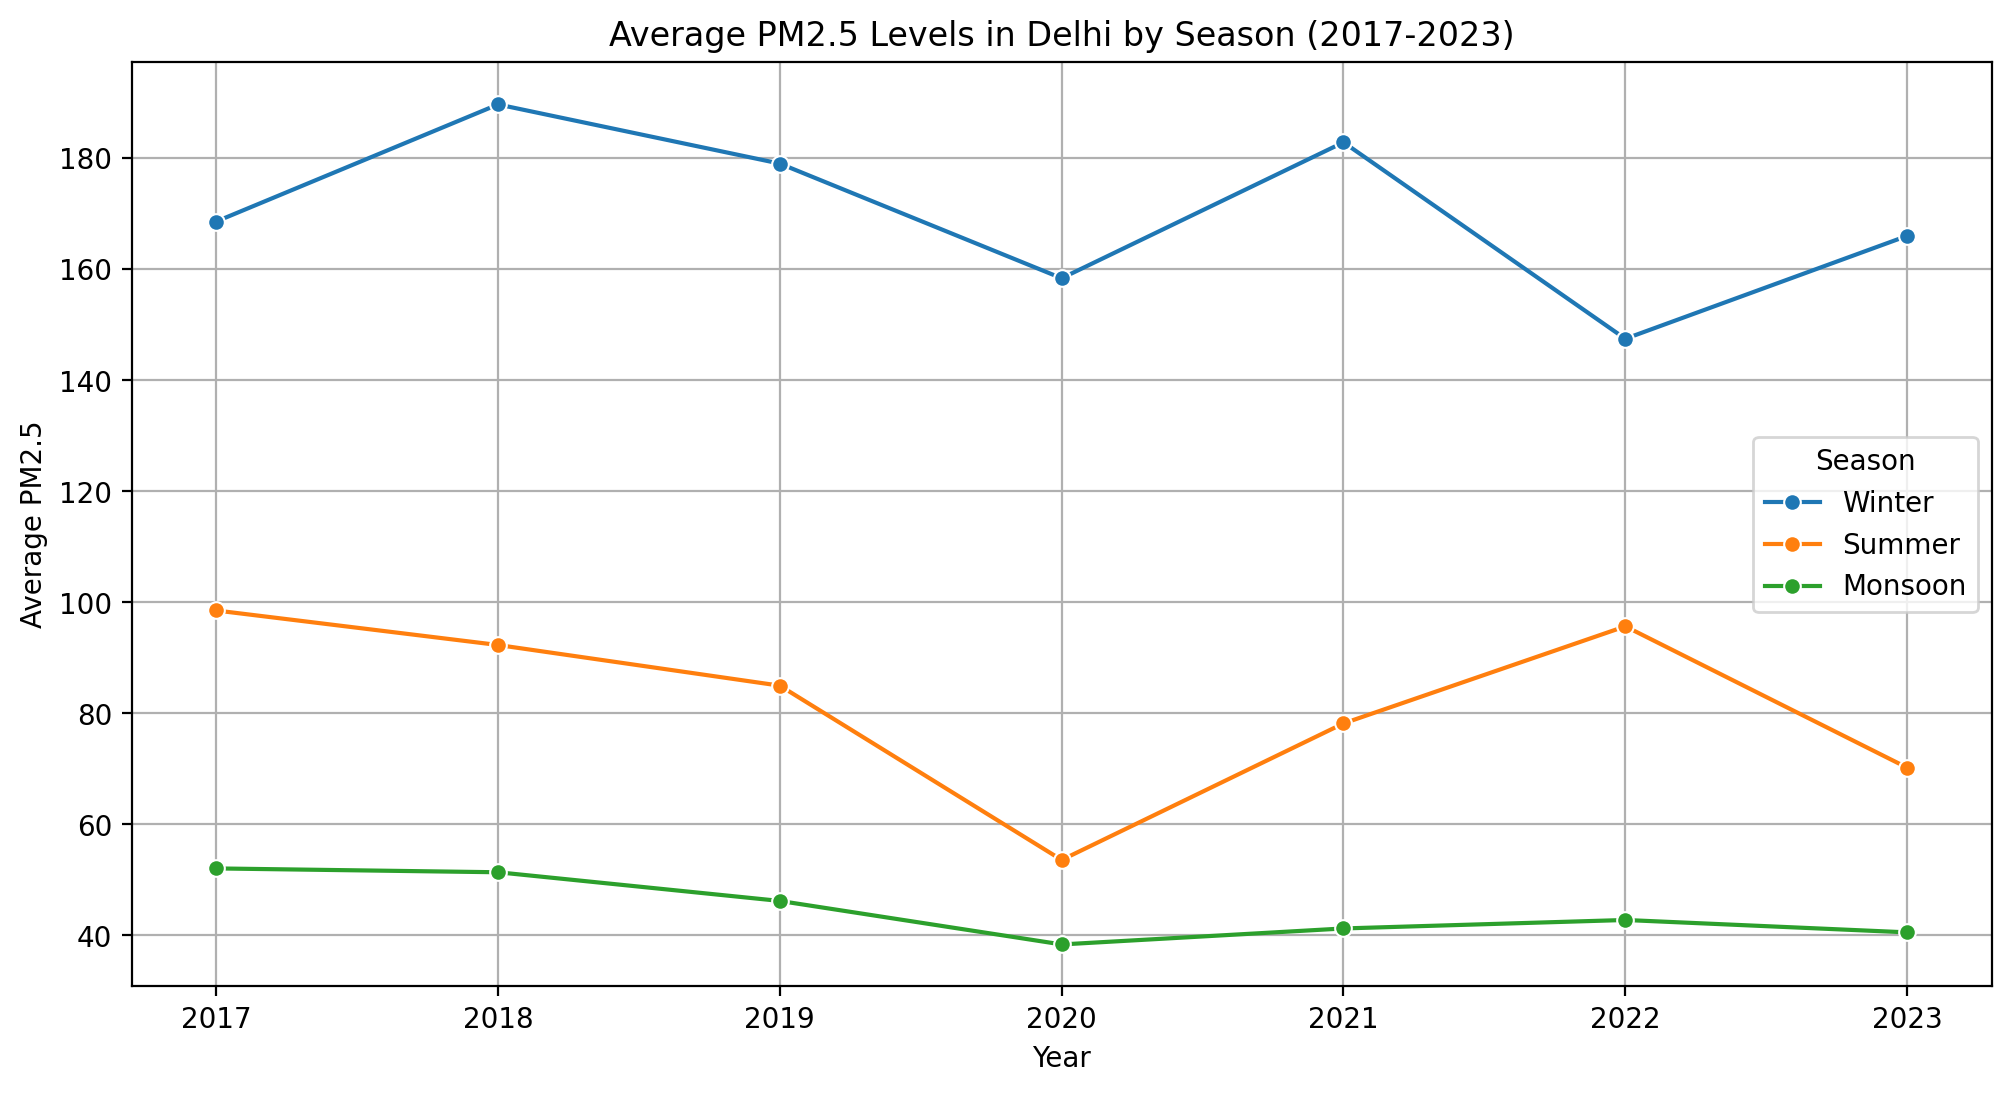

In [12]:
# The variation in pollution levels, which I can notice are that during winter seasons PM2.5 level is usually high
# due to air pollution and fog. This can lead to many hazardous diseases.

delhi_data = df1[df1['state'] == 'Delhi']
seasons = {'Winter': [12, 1, 2], 'Summer': [3, 4, 5], 'Monsoon': [6, 7, 8, 9]}
seasonal_averages = []
for year in range(2017, 2024):
    for season, months in seasons.items():
        seasonal_df = delhi_data[(delhi_data['Timestamp'].dt.year == year) &(delhi_data['Timestamp'].dt.month.isin(months))]
        avg_pm25 = seasonal_df['PM2.5'].mean()
        seasonal_averages.append([year, season, avg_pm25])

seasonal_avg_df = pd.DataFrame(seasonal_averages, columns=['Year', 'Season', 'Avg_PM2.5'])

plt.figure(figsize=(12, 6))
sea.lineplot(data=seasonal_avg_df, x='Year', y='Avg_PM2.5', hue='Season', marker='o')
plt.title('Average PM2.5 Levels in Delhi by Season (2017-2023)')
plt.xlabel('Year')
plt.ylabel('Average PM2.5')
plt.xticks(range(2017,2024))
plt.grid(True)
plt.show()

3. Plot a time-series graph comparing Delhi’s PM2.5 levels with Mumbai’s from 2017 to 2023. Which city had more fluctuations?

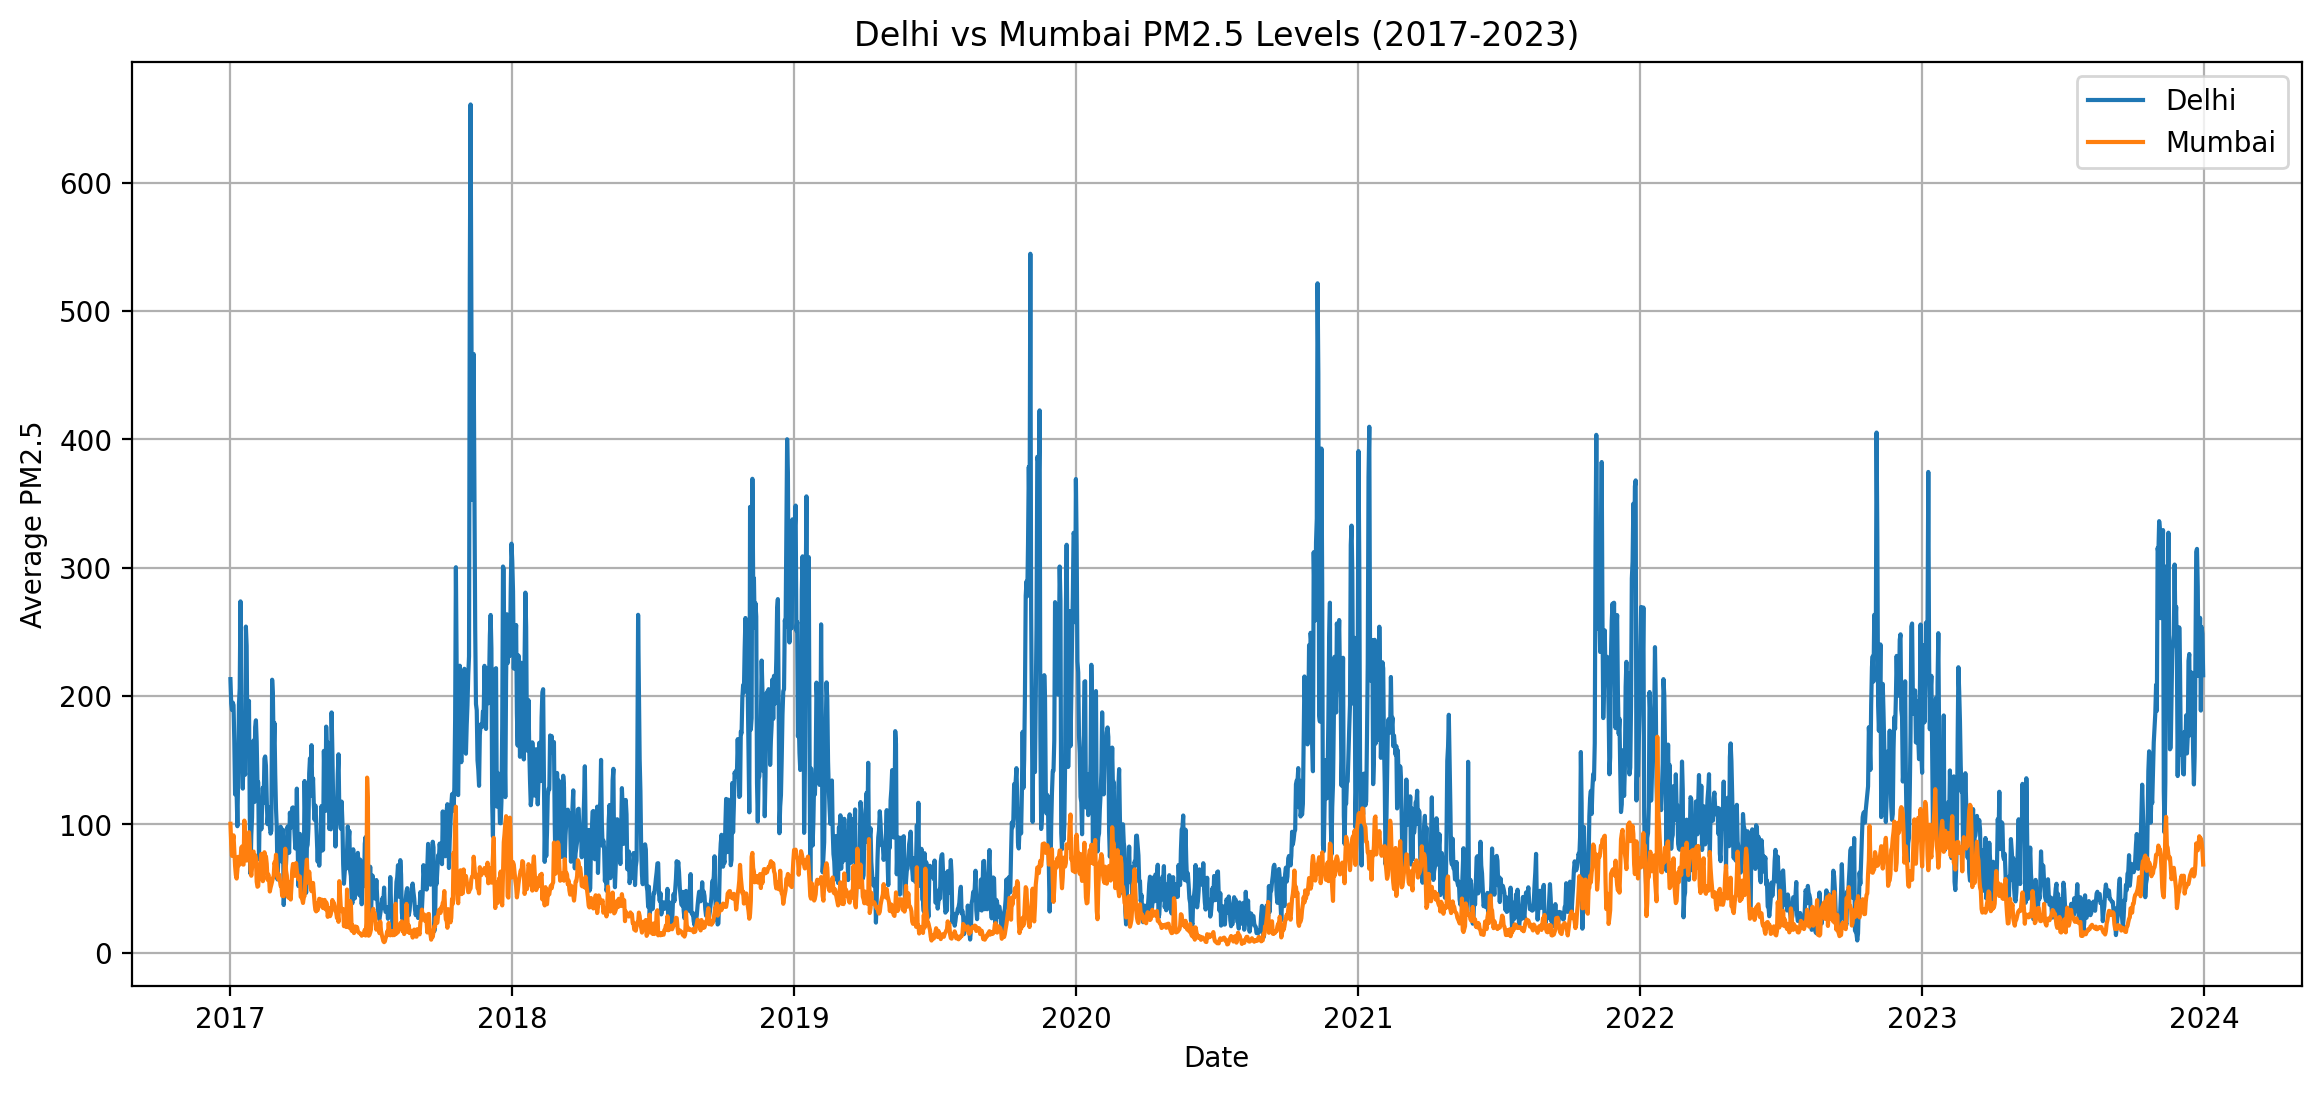

Delhi PM2.5 Standard Deviation: 77.73285570085264
Mumbai PM2.5 Standard Deviation: 24.52821908398644
Delhi shows more fluctuations in PM2.5 levels(2017-2023).


In [79]:
delhi = df1[(df1['state'] == 'Delhi') & (df1['Timestamp'].dt.year >= 2017) & (df1['Timestamp'].dt.year <= 2023)]
mumbai = df1[(df1['state'] == 'Maharashtra') & (df1['Timestamp'].dt.year >= 2017) & (df1['Timestamp'].dt.year <= 2023)]
delhi_avg = delhi.groupby(delhi['Timestamp'].dt.date)['PM2.5'].mean()
mumbai_avg = mumbai.groupby(mumbai['Timestamp'].dt.date)['PM2.5'].mean()

plt.figure(figsize=(14, 6))
plt.plot(delhi_avg.index, delhi_avg.values, label='Delhi')
plt.plot(mumbai_avg.index, mumbai_avg.values, label='Mumbai')
plt.xlabel('Date')
plt.ylabel('Average PM2.5')
plt.title('Delhi vs Mumbai PM2.5 Levels (2017-2023)')
plt.legend()
plt.grid(True)
plt.show()

delhi_std = delhi_avg.std()
mumbai_std = mumbai_avg.std()
print(f"Delhi PM2.5 Standard Deviation: {delhi_std}")
print(f"Mumbai PM2.5 Standard Deviation: {mumbai_std}")
if delhi_std > mumbai_std:
    print("Delhi shows more fluctuations in PM2.5 levels(2017-2023).")
else:
    print("Mumbai shows more fluctuations in PM2.5 levels(2017-2023).")

# Population-Based


1. Which state in India has the highest number of monitoring stations relative to its population?

In [15]:
stations_per_state = df1.groupby('state')['station'].nunique()
df = pd.merge(stations_per_state, df3, left_on='state', right_on='State', how='left')
df['ratio'] = df['station'] / df['Population']
highest_ratio_state = df.loc[df['ratio'].idxmax()]
print(f"The state with the highest number of monitoring stations relative to its population is: {highest_ratio_state['State']}")
highest_ratio_state

The state with the highest number of monitoring stations relative to its population is: Chandigarh


,4
station,3
State,Chandigarh
Population,1055450
Area (km2),114
ratio,0.000003


2. Plot a bar chart showing the top 5 most polluted states in terms of per capita PM2.5 exposure in 2023.

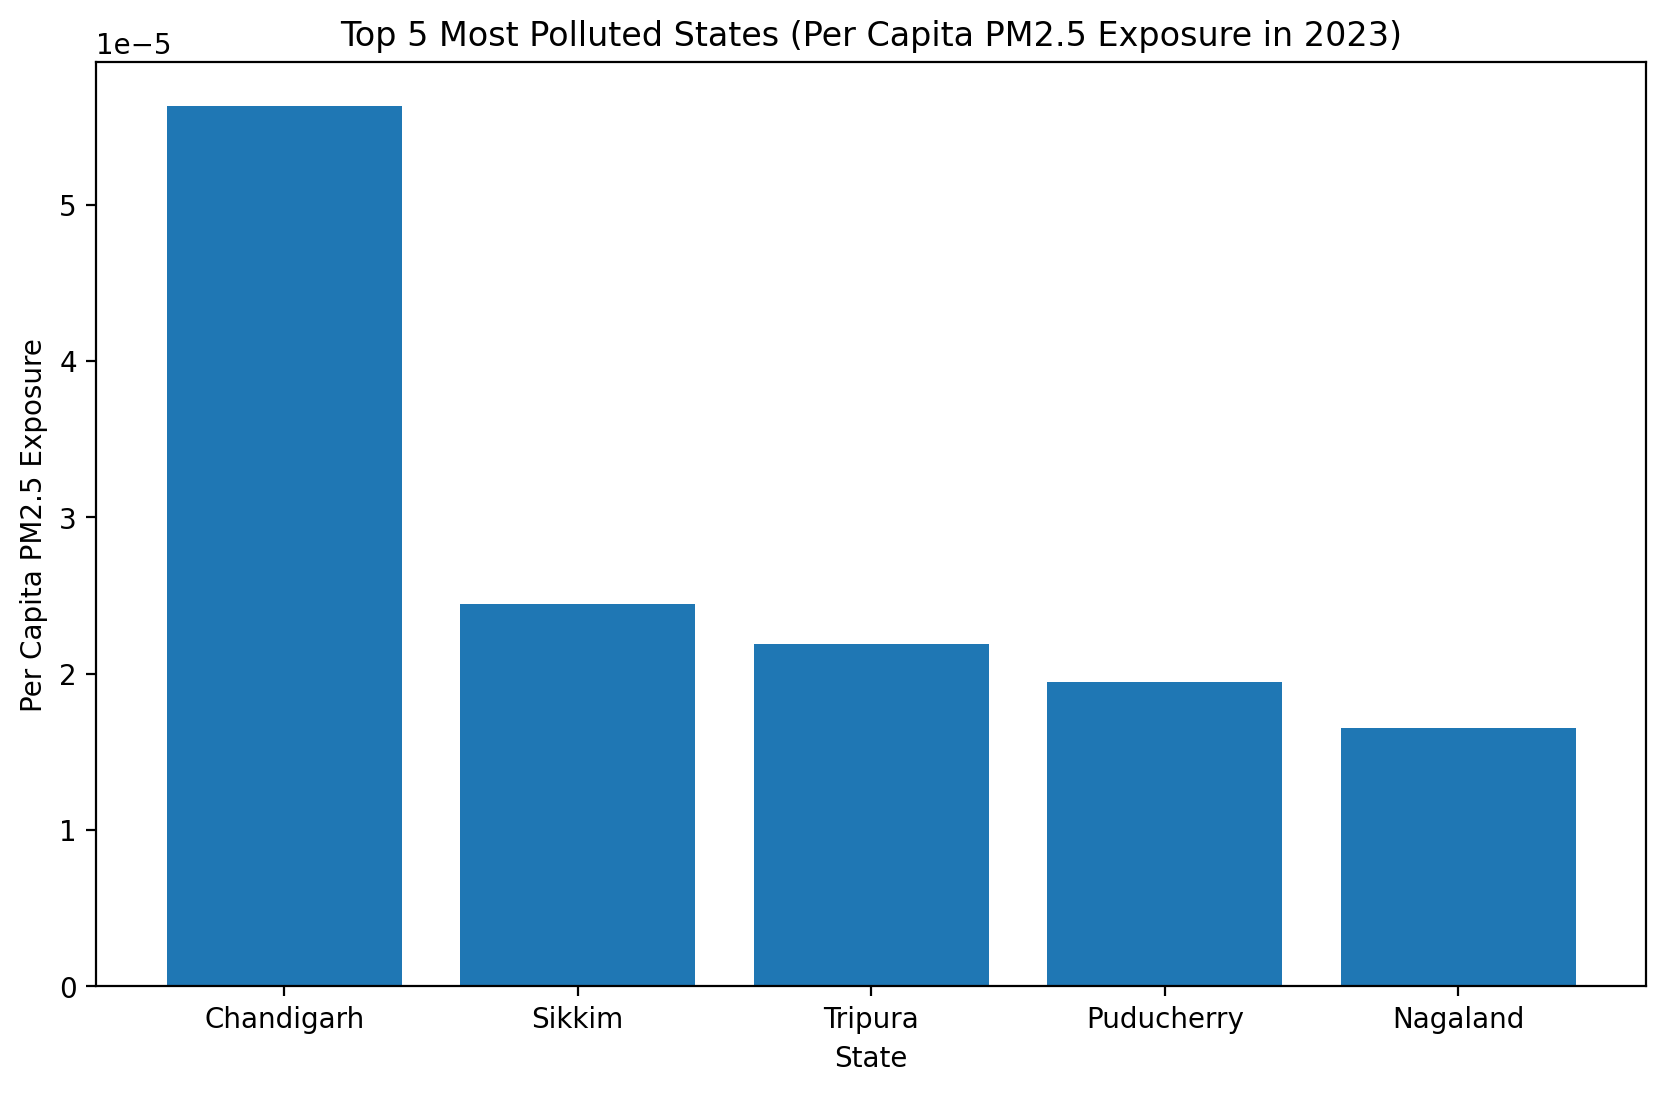

In [80]:
state_pm25_2023 = df_year_2023.groupby('state')['PM2.5'].mean()
state_population = df3.set_index('State')['Population']
per_capita_pm25 = state_pm25_2023 / state_population
per_capita_pm25 = per_capita_pm25.dropna()
top_5_polluted_states = per_capita_pm25.nlargest(5)

plt.figure(figsize=(10, 6))
plt.bar(top_5_polluted_states.index, top_5_polluted_states.values)
plt.xlabel("State")
plt.ylabel("Per Capita PM2.5 Exposure")
plt.title("Top 5 Most Polluted States (Per Capita PM2.5 Exposure in 2023)")
plt.show()

3. Plot the relationship between population density and average PM2.5 concentration for each state. What conclusion can you draw about the correlation between population density and pollution?

    X-axis: Population density (people per square kilometer).
    Y-axis: Average PM2.5 concentration.
    Use a scatter plot to show the relationship, where each point represents a state.


Text(0.5, 1.0, 'relationship between population density and average PM2.5 concentration.')

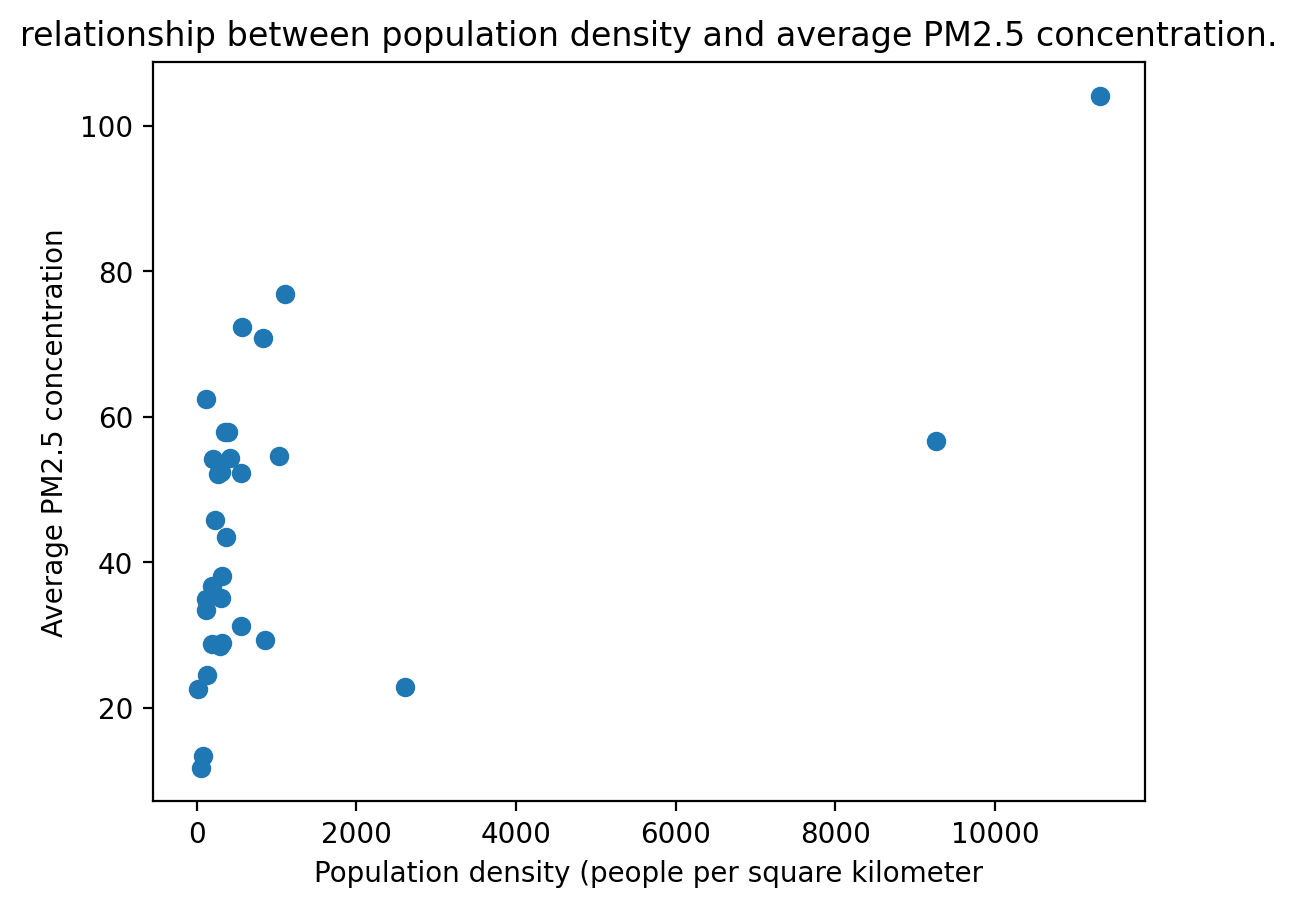

In [90]:

df3=df3.sort_values(by=['State'])
population_dens=df3['Population']/df3['Area (km2)']
mean=df1.groupby('state')['PM2.5'].mean()
plt.scatter(population_dens.values,mean.values)
plt.xlabel("Population density (people per square kilometer")
plt.ylabel("Average PM2.5 concentration")
plt.title("relationship between population density and average PM2.5 concentration.")

# Area Based


1. Which state has the highest PM2.5 concentration per square kilometer? Plot the pollution levels for all states relative to their area.
X-axis: States.
Y-axis: PM2.5 concentration per square kilometer.
Use a bar plot where each bar represents a state, and the height shows PM2.5 per sq km.



The state with the highest PM2.5 concentration per square kilometer is: Delhi


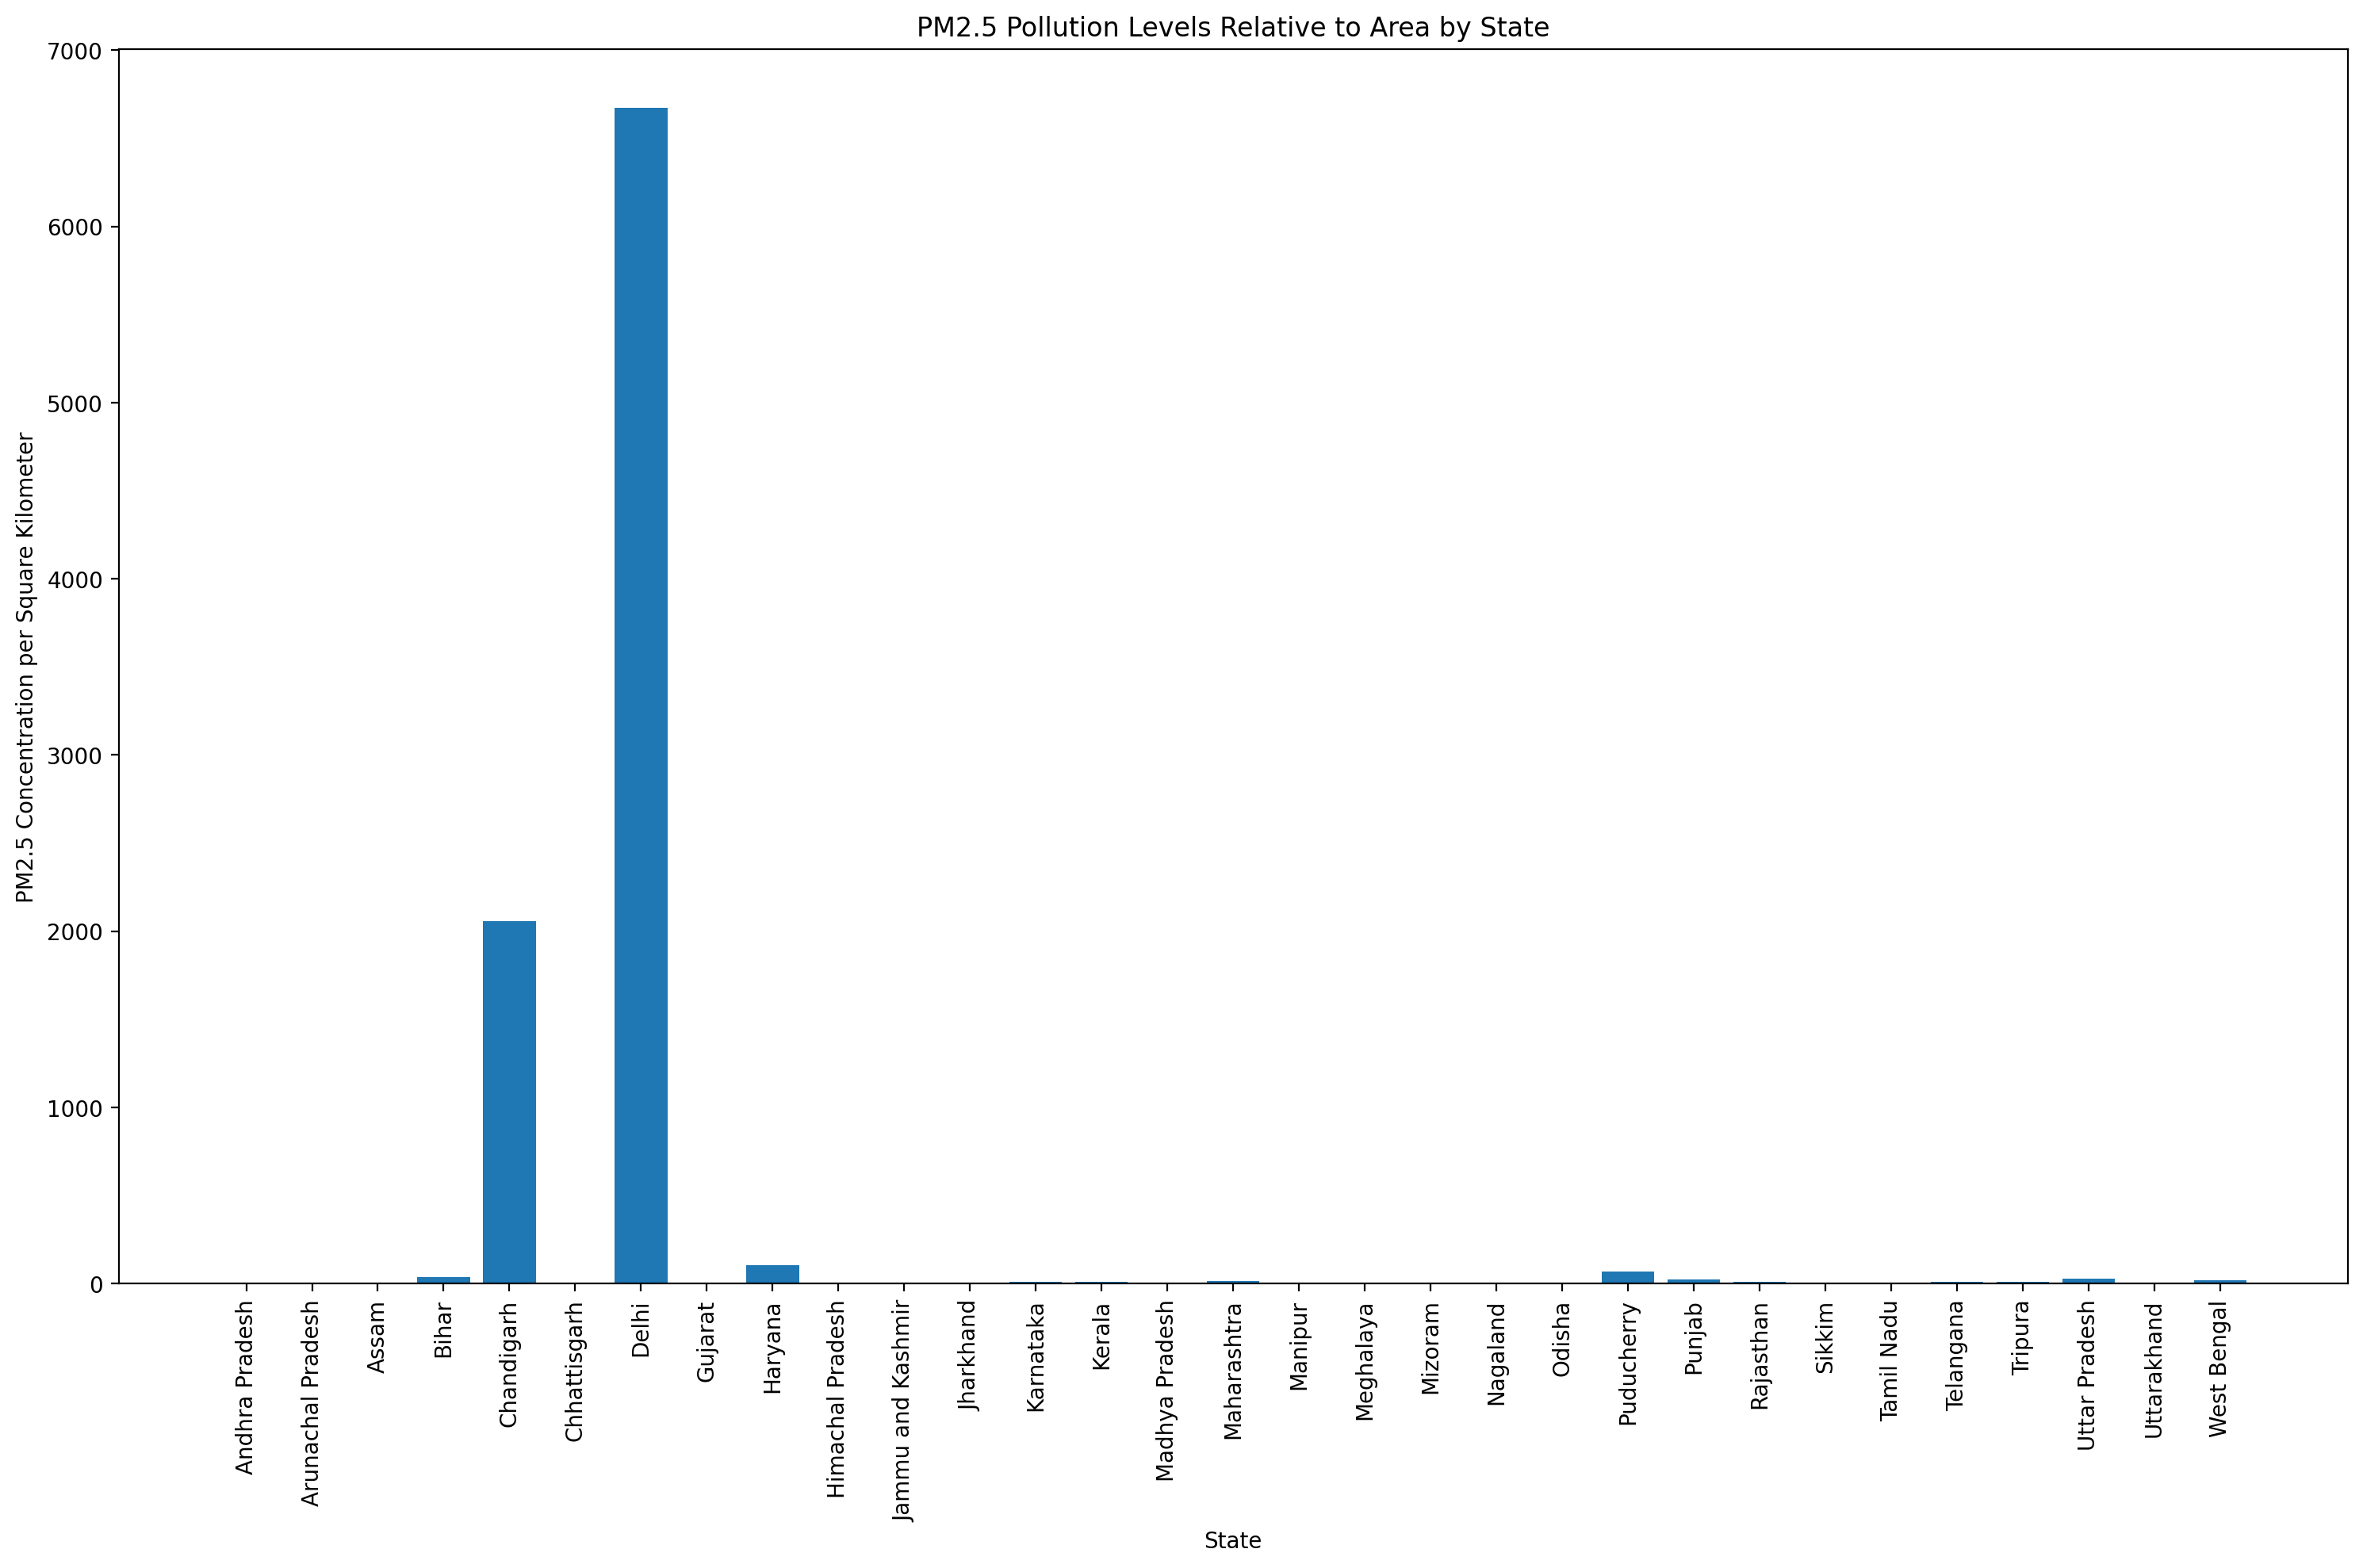

In [98]:

df_grp = df1.groupby('state')['PM2.5'].sum()
conc_per_area = df_grp / df3.set_index('State')['Area (km2)']
max_state = conc_per_area.idxmax()
print("The state with the highest PM2.5 concentration per square kilometer is:",max_state)
plt.figure(figsize=(15, 10))
plt.bar(conc_per_area.index, conc_per_area.values)
plt.xlabel("State")
plt.ylabel("PM2.5 Concentration per Square Kilometer")
plt.title("PM2.5 Pollution Levels Relative to Area by State")
plt.xticks(rotation=90)
plt.tight_layout()

2. Compare the total number of monitoring stations per square kilometer in each state. Identify the state with the highest density of monitoring stations relative to its area. Show a bar plot where each bar represents a state, and the height shows the number of monitoring stations per square kilometer.

The state with the highest density of monitoring stations is: Delhi


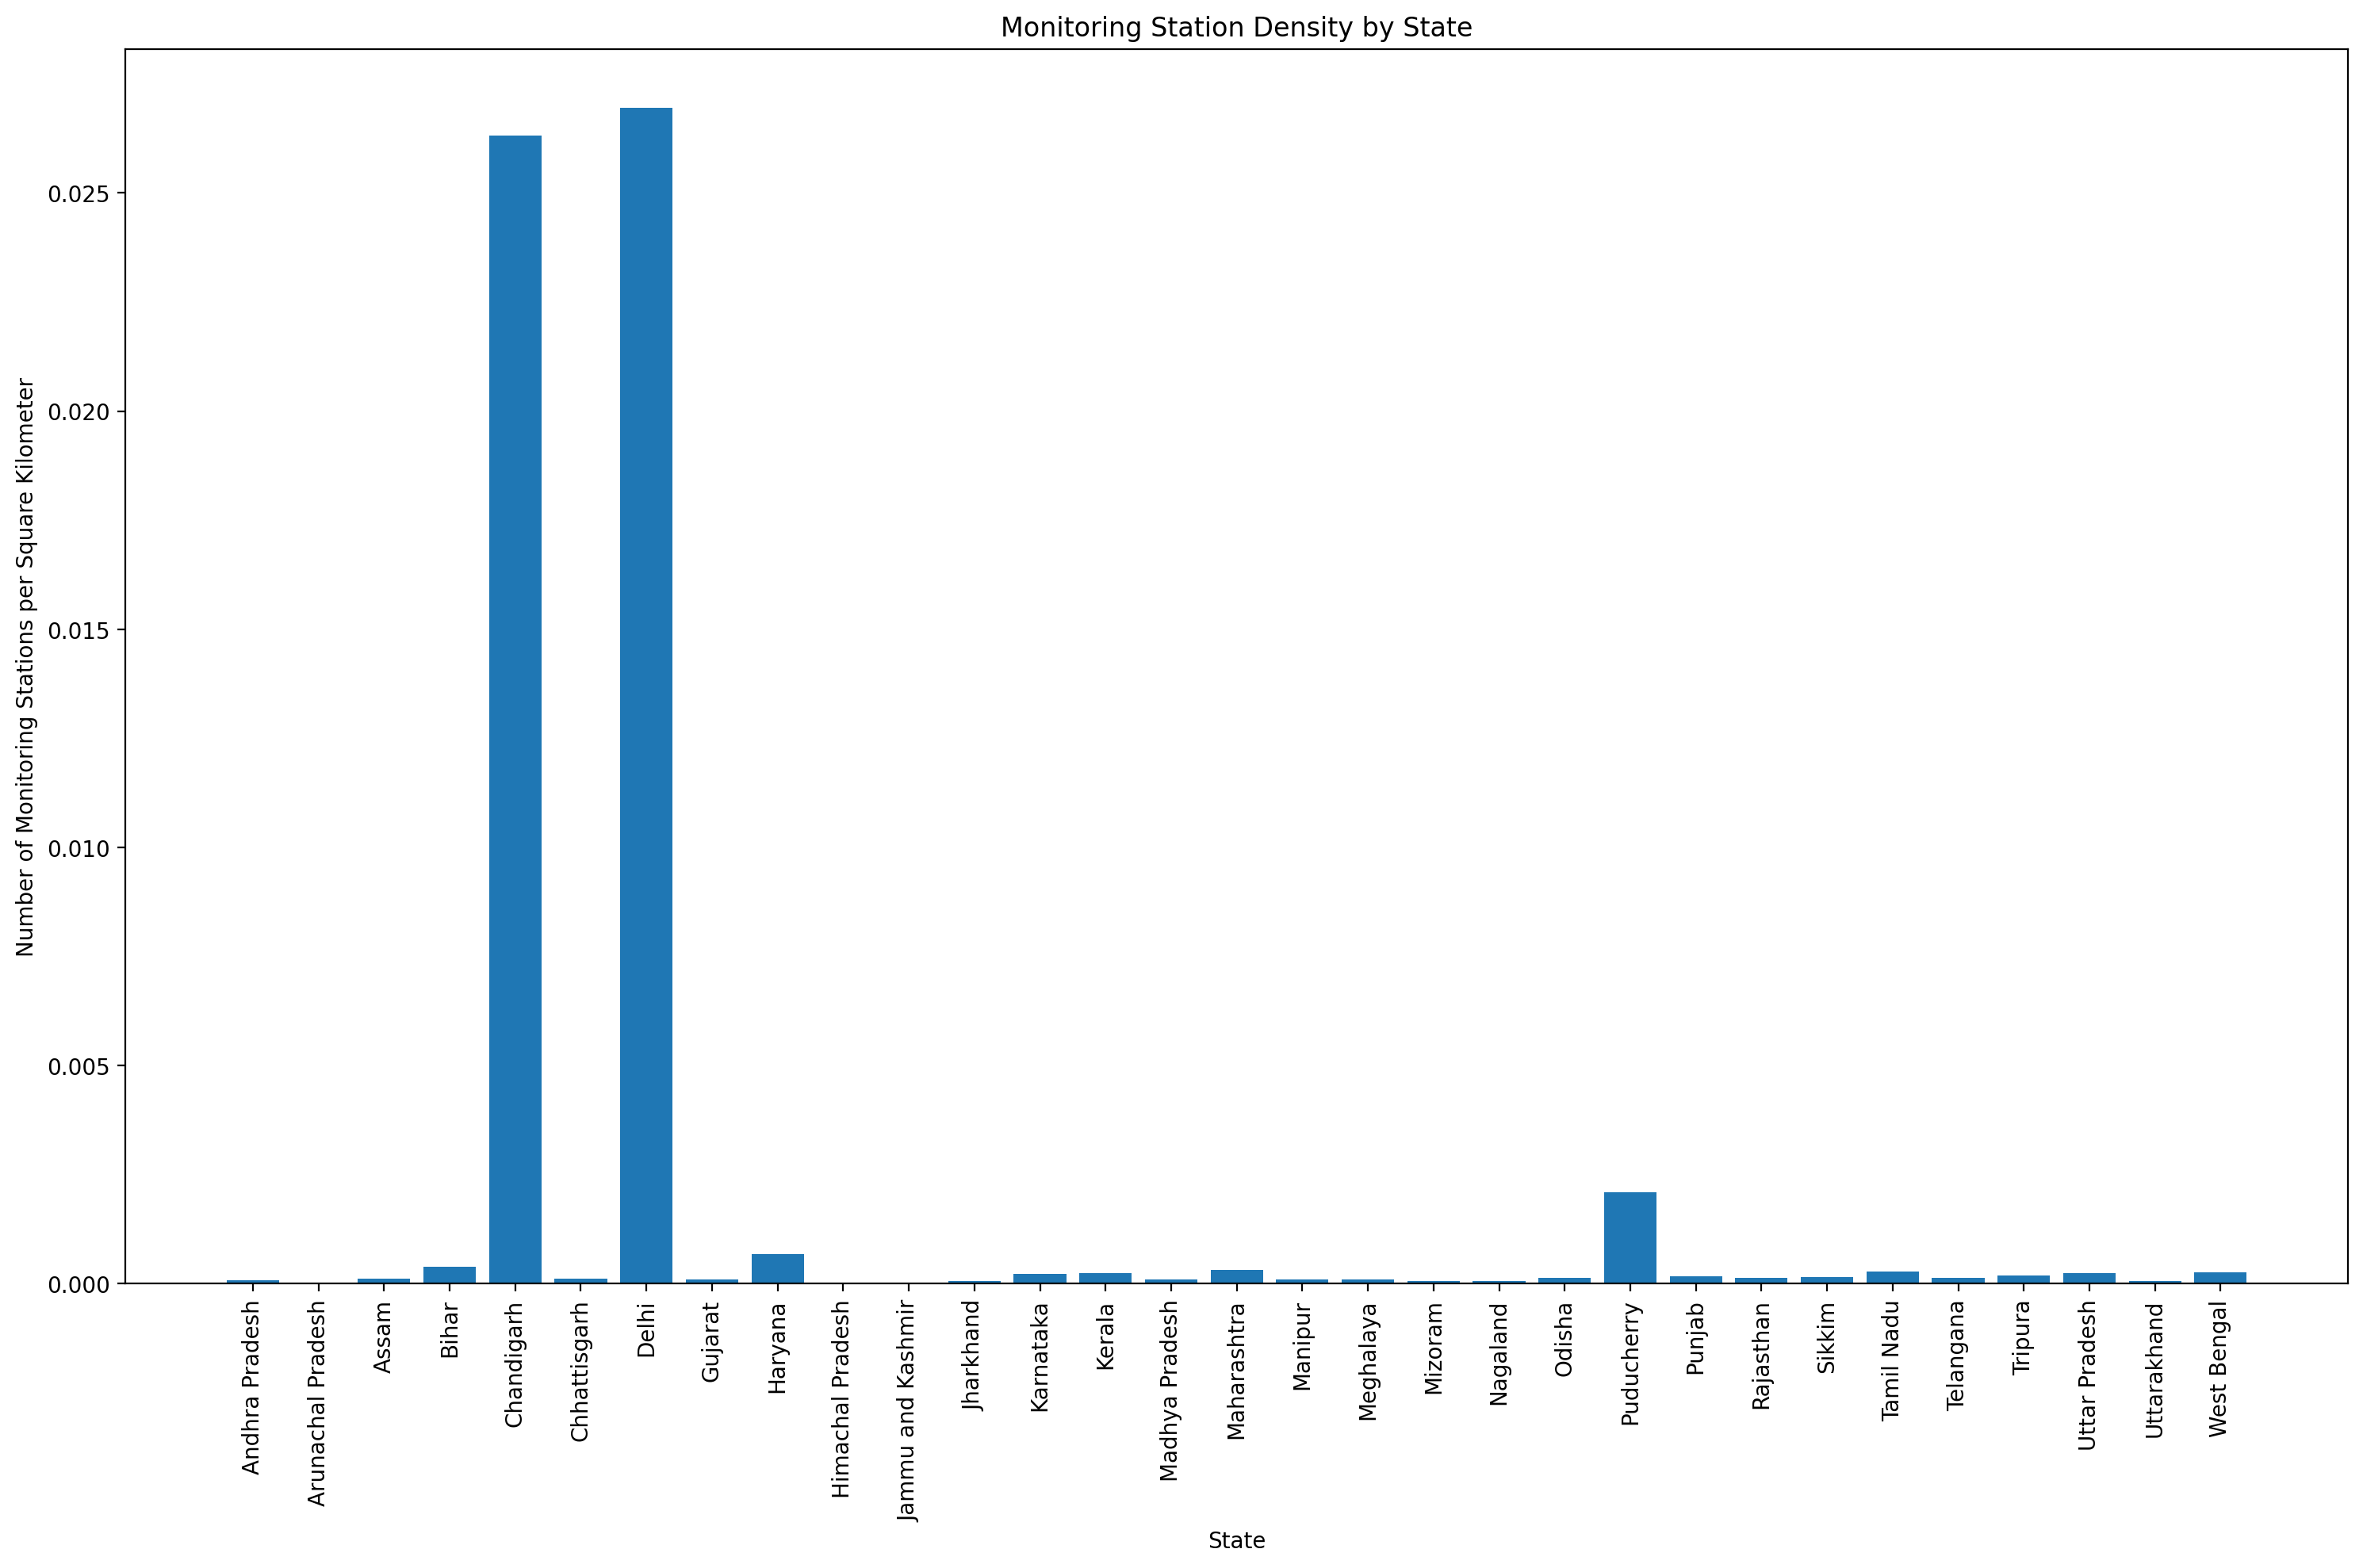

In [100]:
stations_per_sqkm = df1.groupby('state')['station'].nunique() / df3.set_index('State')['Area (km2)']
state_with_highest_density = stations_per_sqkm.idxmax()
print(f"The state with the highest density of monitoring stations is: {state_with_highest_density}")

plt.figure(figsize=(15, 10))
plt.bar(stations_per_sqkm.index, stations_per_sqkm.values)
plt.xlabel("State")
plt.ylabel("Number of Monitoring Stations per Square Kilometer")
plt.title("Monitoring Station Density by State")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

3. Compare the average PM2.5 levels between Maharashtra and Madhya Pradesh over the year 2021. Given that both states have similar area sizes but different population densities, analyze how population density impacts pollution levels in these two states.




In [102]:
maharashtra_2021 = df1[(df1['state'] == 'Maharashtra') & (df1['Timestamp'].dt.year == 2021)]
madhya_pradesh_2021 = df1[(df1['state'] == 'Madhya Pradesh') & (df1['Timestamp'].dt.year == 2021)]
avg_pm25_maharashtra = maharashtra_2021['PM2.5'].mean()
avg_pm25_madhya_pradesh = madhya_pradesh_2021['PM2.5'].mean()
print(f"Average PM2.5 in Maharashtra (2021): {avg_pm25_maharashtra:.2f}")
print(f"Average PM2.5 in Madhya Pradesh (2021): {avg_pm25_madhya_pradesh:.2f}")
# If the population density is high in a given region , pollution level will also be high.

Average PM2.5 in Maharashtra (2021): 46.44
Average PM2.5 in Madhya Pradesh (2021): 47.10


# Funding Based

1. Compare the average PM2.5 levels between states that received NCAP funding and those that did not in 2021.


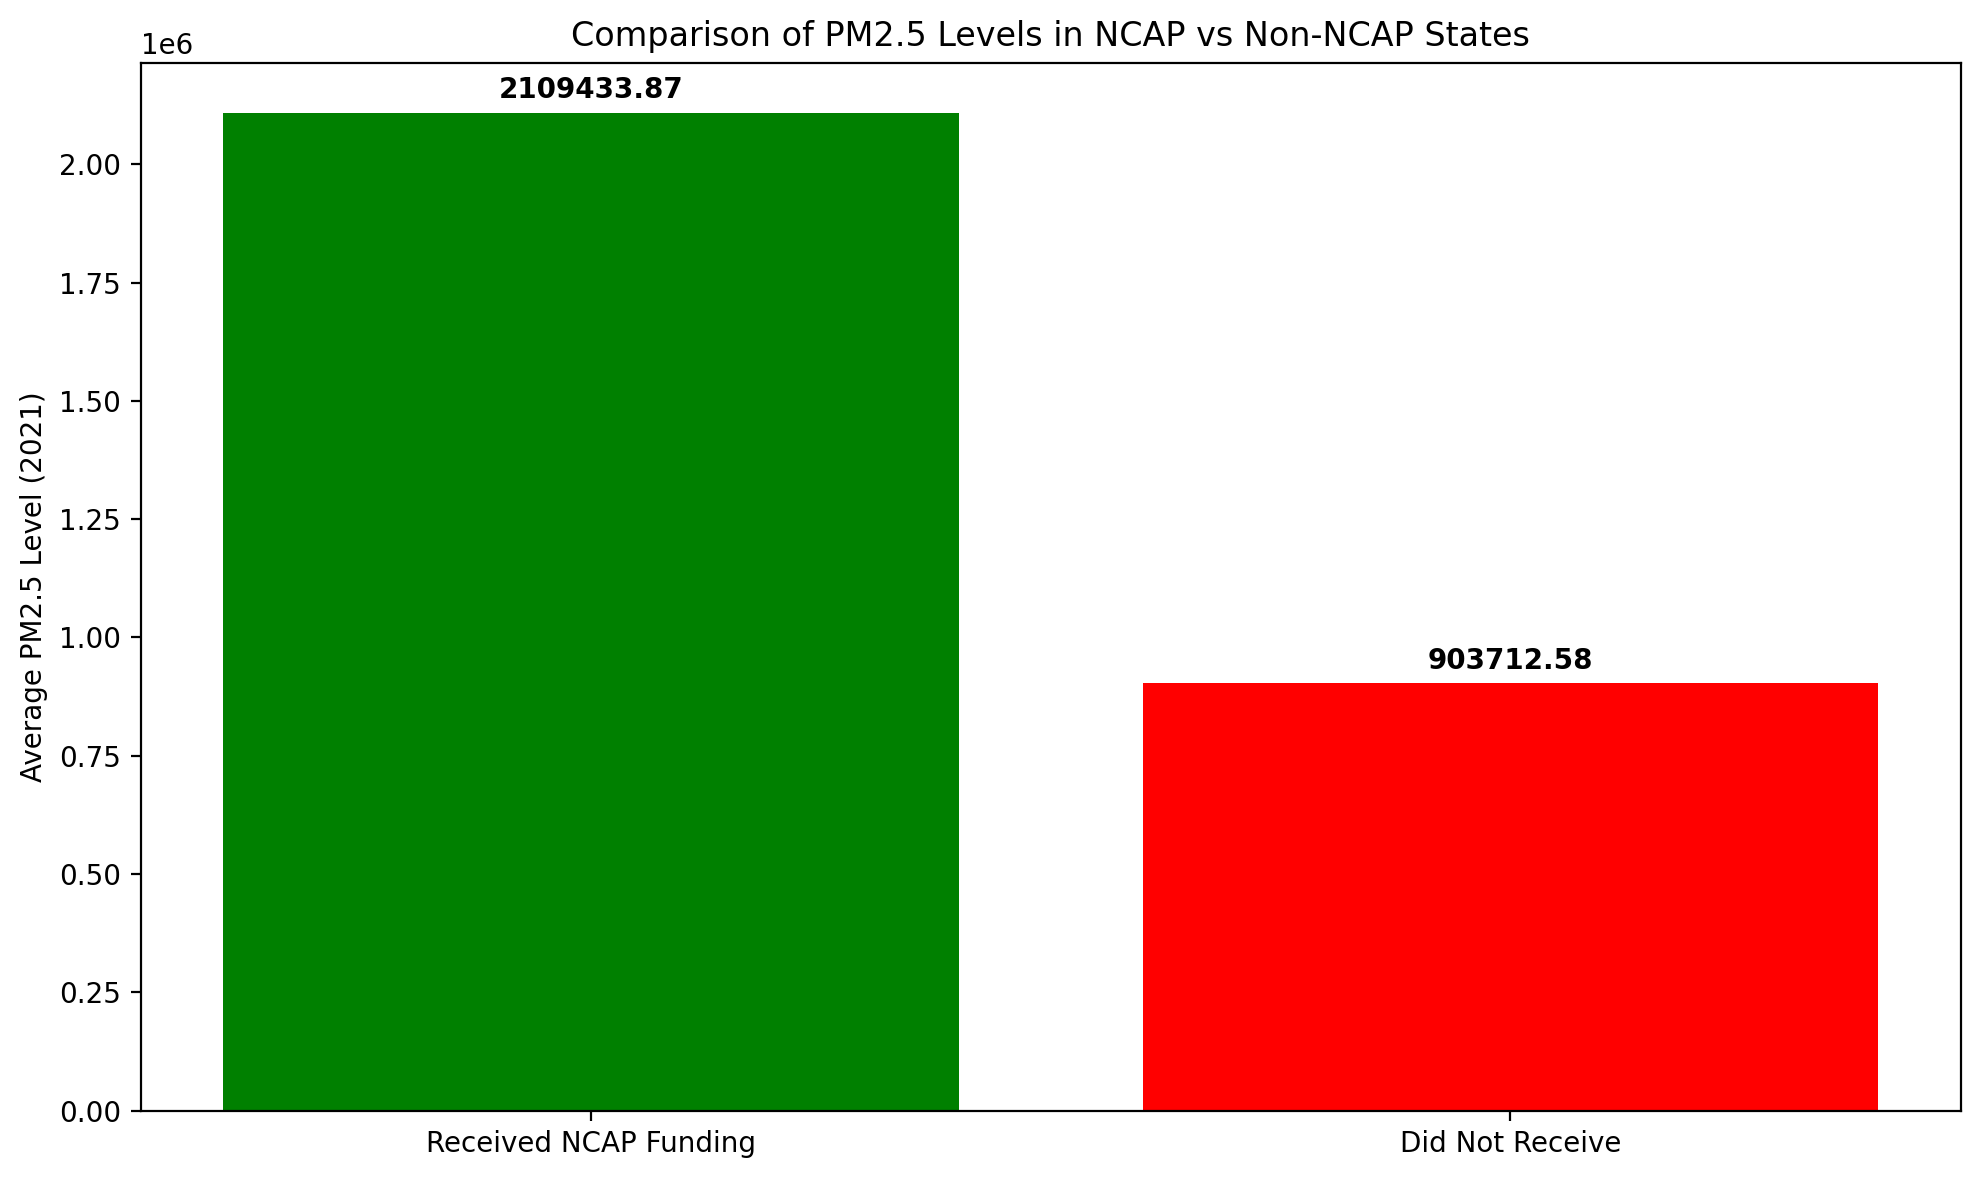

In [141]:
df2[df2 == '-'] = np.nan
df2['Amount released during FY 2020-21'] = df2['Amount released during FY 2020-21'].astype(float)
df2['Amount released during FY 2021-22'] = df2['Amount released during FY 2021-22'].astype(float)
df2['Total fund released'] = df2['Total fund released'].astype(float)
df2['Utilisation as on June 2022'] = df2['Utilisation as on June 2022'].astype(float)
df2['State'] = df2['State'].replace({'Jammu & Kashmir': 'Jammu and Kashmir'})
funding_state = df2.groupby('State')['Amount released during FY 2021-22'].sum()
received = funding_state[funding_state != 0]
didnt_recieve = funding_state[funding_state == 0]

pm2_21 = df1.groupby('state')['PM2.5'].sum()

pm2_received = pm2_21[received.index].mean()
pm2_didnt_receive = pm2_21[didnt_recieve.index].mean()

categories = ["Received NCAP Funding", "Did Not Receive"]
values = [pm2_received, pm2_didnt_receive]

plt.figure(figsize=(10, 6))
bars = plt.bar(categories, values, color=['green', 'red'])

plt.bar_label(bars, fmt = '%.2f', padding = 3, fontsize = 10, fontweight = 'bold')
plt.ylabel("Average PM2.5 Level (2021)")
plt.title("Comparison of PM2.5 Levels in NCAP vs Non-NCAP States")
plt.tight_layout()

Create a time series plot showing PM2.5 levels with an increment in NCAP funding for Assam. Has an increment of the financing led to noticeable improvements in air quality?


<ipython-input-113-5cec2c28fab7>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  assam_data['Timestamp'] = pd.to_datetime(assam_data['Timestamp'])


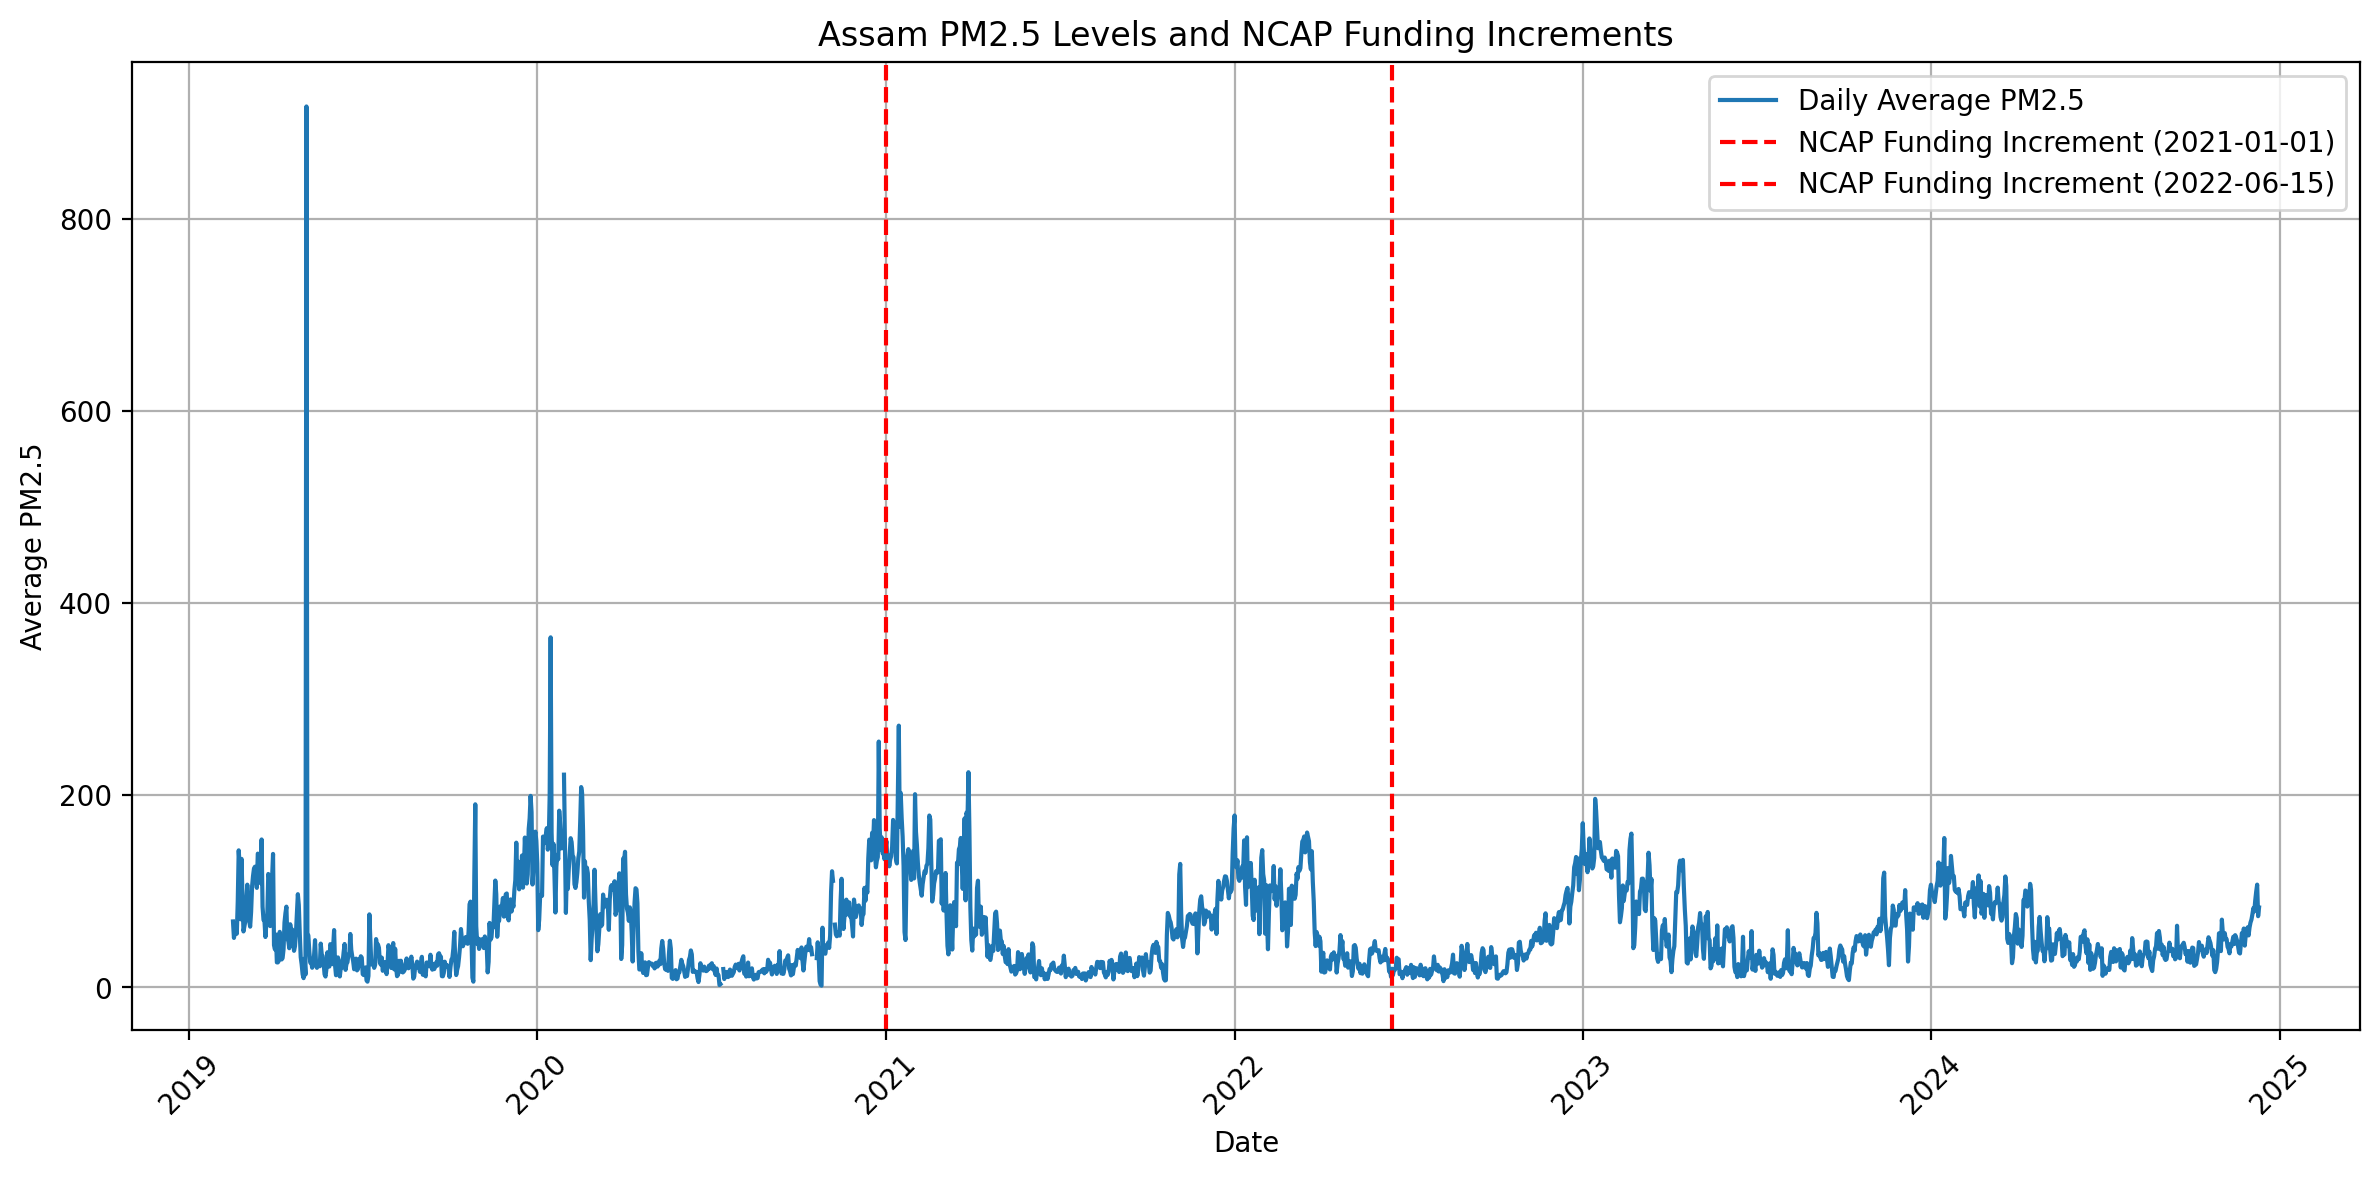

In [113]:
assam_data = df_merged[df_merged['state'] == 'Assam']
assam_data['Timestamp'] = pd.to_datetime(assam_data['Timestamp'])
daily_avg_pm25 = assam_data.groupby('Timestamp')['PM2.5'].mean()

plt.figure(figsize=(12, 6))
plt.plot(daily_avg_pm25.index, daily_avg_pm25.values, label='Daily Average PM2.5')
funding_dates = ['2021-01-01', '2022-06-15']
for date in funding_dates:
    plt.axvline(pd.to_datetime(date), color='red', linestyle='--', label=f'NCAP Funding Increment ({date})')

plt.xlabel('Date')
plt.ylabel('Average PM2.5')
plt.title('Assam PM2.5 Levels and NCAP Funding Increments')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
# yes, an increment of the financing led to noticable improvement in air quality.

3. Create a scatter plot to showcase the area versus funding received by a state. Mark every state with a different color and show the legend outside the plot.


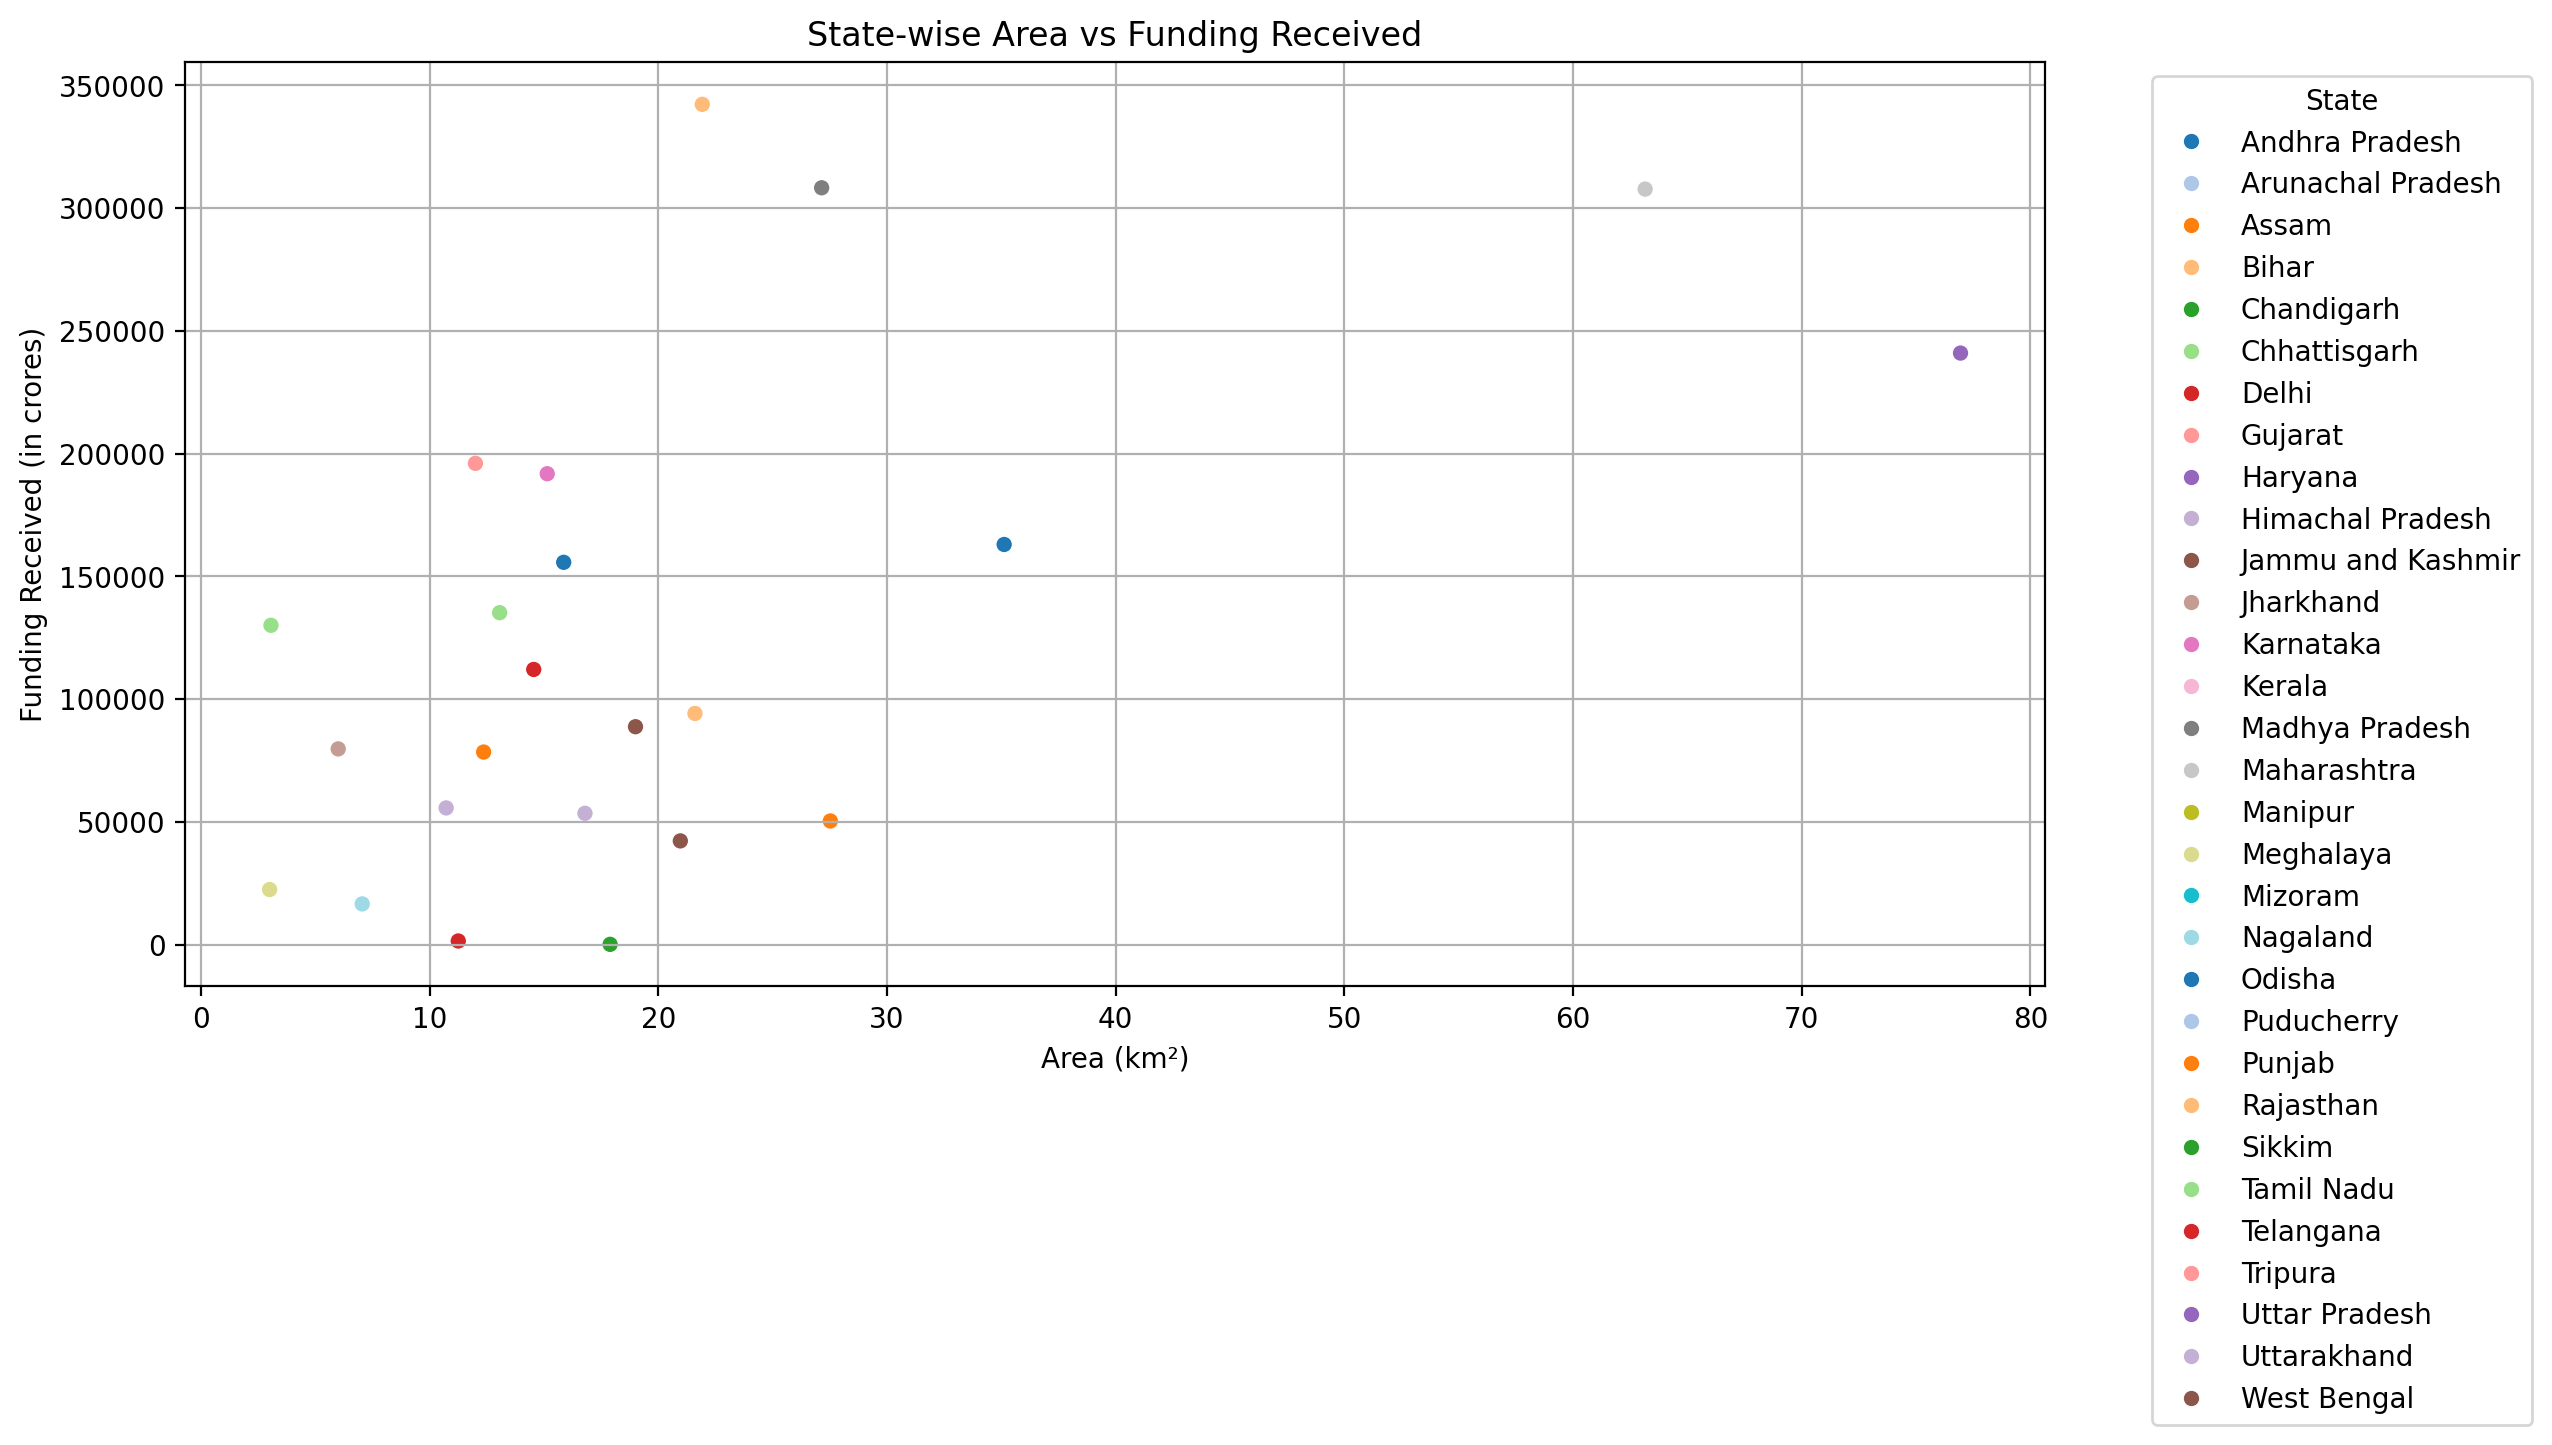

In [134]:
funding_state_all = df2.groupby('State')['Total fund released'].sum()
if 'Total fund' in df3.columns:
    df3 = df3.drop(columns = 'Total fund')
df3 = df3.merge(funding_state_all.rename('Total fund'), on = 'State', how = 'left')
plt.figure(figsize = (12, 6))
sea.scatterplot(data = df3, y = 'Area (km2)', x = 'Total fund', hue = 'State', palette = 'tab20')

plt.xlabel('Area (km²)')
plt.ylabel('Funding Received (in crores)')
plt.title('State-wise Area vs Funding Received')

plt.legend(bbox_to_anchor = (1.05, 1), loc = 'upper left', title = "State")
plt.grid(True)
plt.show()

# Miscellaneous Questions

1. For the most polluted city in 2023 (highest average pollution in 2023), calculate the percentage of days with PM2.5 levels above the hazardous threshold (300 µg/m³)

In [21]:
most_polluted_city = df_year_2023.groupby('city')['PM2.5'].mean().idxmax()
most_polluted_city_data = df_year_2023[df_year_2023['city'] == most_polluted_city]
hazardous_days = most_polluted_city_data[most_polluted_city_data['PM2.5'] > 300]['Timestamp'].count()
total_days = len(most_polluted_city_data['Timestamp'].unique())
percentage_hazardous_days = (hazardous_days / total_days) * 100
print(f"The most polluted city in 2023 is: {most_polluted_city}")
print(f"Percentage of days with PM2.5 above 300 µg/m³: {percentage_hazardous_days:.2f}%")

The most polluted city in 2023 is: Darbhanga
Percentage of days with PM2.5 above 300 µg/m³: 0.82%


2. Analyze the PM2.5 levels in Delhi during Diwali (October-November) and New Year compared to regular months over the 3 years (2018-2020). Do you observe any significant pollution spikes during these festivals? If spikes are observed, Can you mark these spikes using arrows?

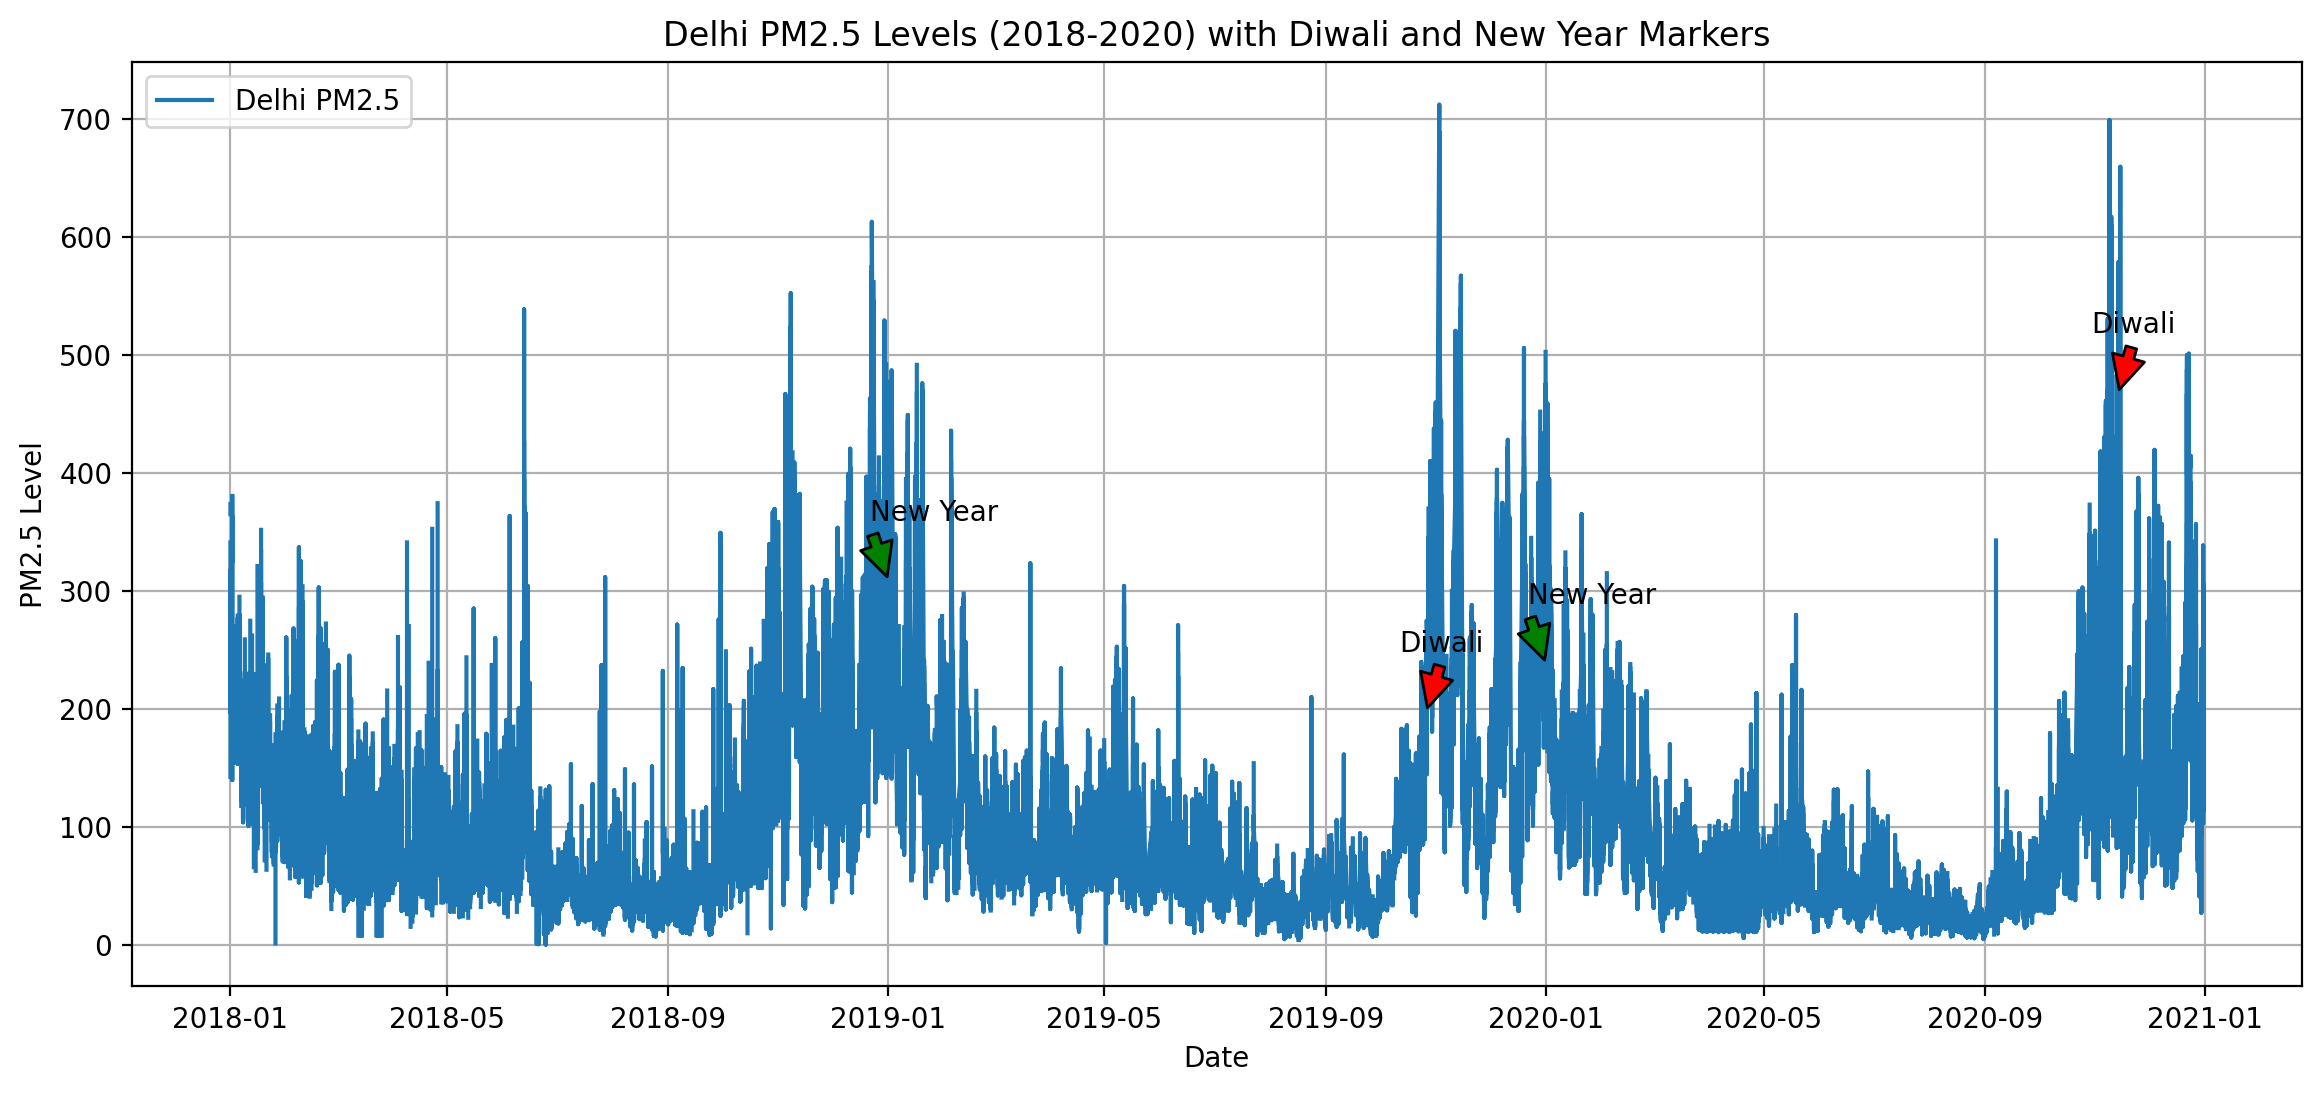

In [26]:
delhi_data = df1[(df1['state'] == 'Delhi') & (df1['Timestamp'].dt.year.isin([2018, 2019, 2020]))]
diwali_periods = pd.to_datetime(['2018-10-19', '2019-10-27', '2020-11-14'])
new_year_periods = pd.to_datetime(['2019-01-01', '2020-01-01'])
plt.figure(figsize=(14, 6))
plt.plot(delhi_data['Timestamp'], delhi_data['PM2.5'], label='Delhi PM2.5')
for date in diwali_periods:
    plt.annotate('Diwali', xy=(date, delhi_data[delhi_data['Timestamp'].dt.date == date.date()]['PM2.5'].values[0]),
                 xytext=(date - pd.DateOffset(days=15), delhi_data[delhi_data['Timestamp'].dt.date == date.date()]['PM2.5'].values[0] + 50),
                 arrowprops=dict(facecolor='red', shrink=0.05))
for date in new_year_periods:
    plt.annotate('New Year', xy=(date, delhi_data[delhi_data['Timestamp'].dt.date == date.date()]['PM2.5'].values[0]),
                 xytext=(date - pd.DateOffset(days=10), delhi_data[delhi_data['Timestamp'].dt.date == date.date()]['PM2.5'].values[0] + 50),
                 arrowprops=dict(facecolor='green', shrink=0.05))
plt.xlabel('Date')
plt.ylabel('PM2.5 Level')
plt.title('Delhi PM2.5 Levels (2018-2020) with Diwali and New Year Markers')
plt.legend()
plt.grid(True)
plt.show()

3. Identify the state that received the highest NCAP funding in 2020 and determine if its air pollution levels improved significantly by 2023. Use a line graph to compare yearly average PM2.5 trends.

State with highest NCAP funding in 2020: Andhra Pradesh


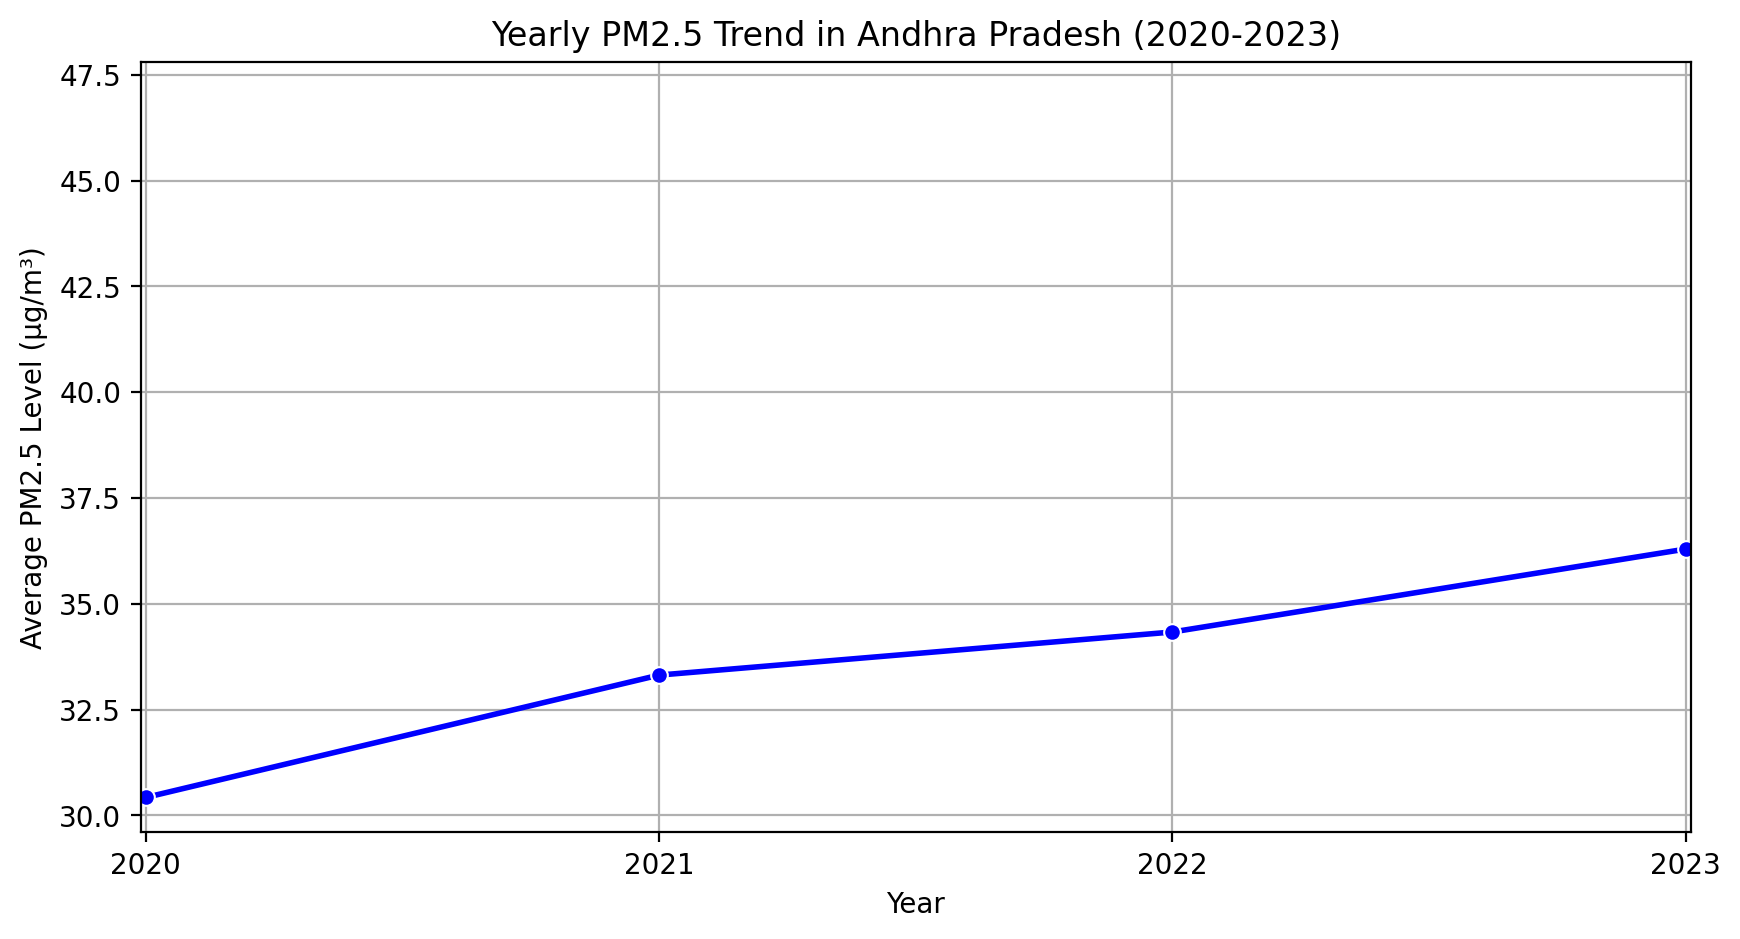

In [137]:
highest_funding_state = df2.groupby('State')['Amount released during FY 2020-21'].sum().idxmax()

print(f"State with highest NCAP funding in 2020: {highest_funding_state}")

state_pm_trend = df1[df1['state'] == highest_funding_state].groupby('year')['PM2.5'].mean()

plt.figure(figsize=(10, 5))
sea.lineplot(x = state_pm_trend.index, y = state_pm_trend.values, marker = 'o', linewidth = 2, color = 'b')

plt.xlabel("Year")
plt.ylabel("Average PM2.5 Level (μg/m³)")
plt.xlim(2019.99,2023.01)
plt.xticks([2020,2021,2022,2023])
plt.title(f"Yearly PM2.5 Trend in {highest_funding_state} (2020-2023)")
plt.grid(True)

plt.show()

#its pollution level increased from 2020 to 2023

3. Draw the map of India and plot the sensor locations on the map.


/usr/local/lib/python3.11/dist-packages/cartopy/io/__init__.py:241: DownloadWarning: Downloading: https://naturalearth.s3.amazonaws.com/50m_physical/ne_50m_land.zip
  warnings.warn(f'Downloading: {url}', DownloadWarning)
/usr/local/lib/python3.11/dist-packages/cartopy/io/__init__.py:241: DownloadWarning: Downloading: https://naturalearth.s3.amazonaws.com/50m_physical/ne_50m_ocean.zip
  warnings.warn(f'Downloading: {url}', DownloadWarning)
/usr/local/lib/python3.11/dist-packages/cartopy/io/__init__.py:241: DownloadWarning: Downloading: https://naturalearth.s3.amazonaws.com/50m_physical/ne_50m_coastline.zip
  warnings.warn(f'Downloading: {url}', DownloadWarning)
/usr/local/lib/python3.11/dist-packages/cartopy/io/__init__.py:241: DownloadWarning: Downloading: https://naturalearth.s3.amazonaws.com/50m_cultural/ne_50m_admin_0_boundary_lines_land.zip
  warnings.warn(f'Downloading: {url}', DownloadWarning)
/usr/local/lib/python3.11/dist-packages/cartopy/io/__init__.py:241: DownloadWarning: Do

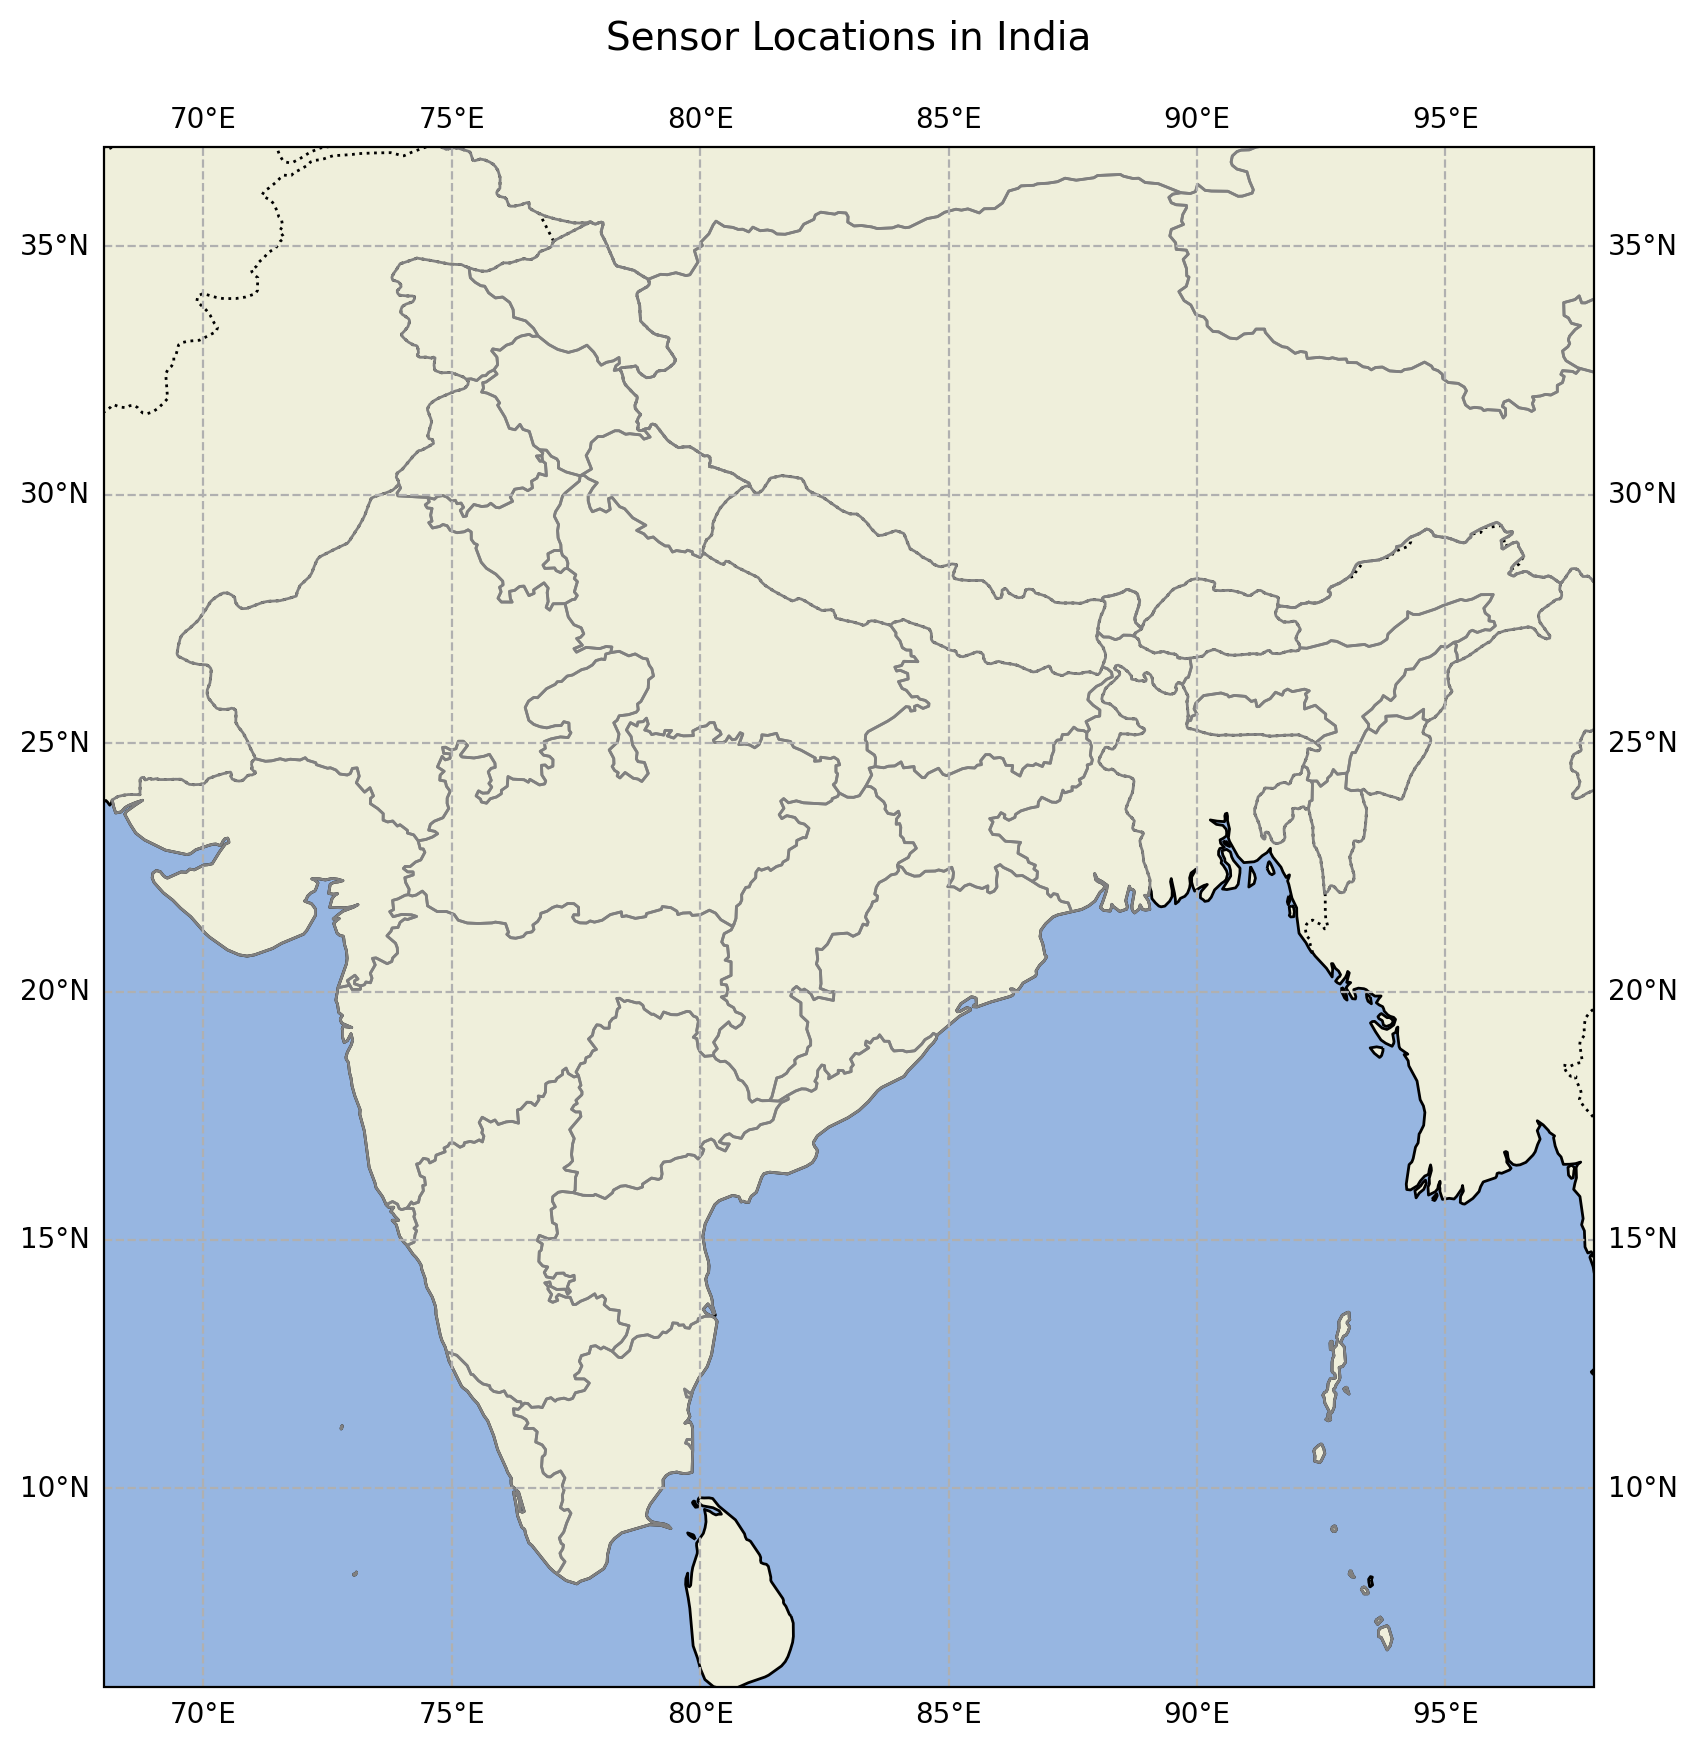

In [140]:
import cartopy.crs as ccrs
import cartopy.feature as cfeature


fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(1, 1, 1, projection = ccrs.PlateCarree())

ax.set_extent([68, 98, 6, 37], crs=ccrs.PlateCarree())

ax.add_feature(cfeature.LAND)
ax.add_feature(cfeature.OCEAN)
ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.BORDERS, linestyle=':')
ax.add_feature(cfeature.STATES, edgecolor='gray')

ax.gridlines(draw_labels=True, linestyle='--')


plt.title('Sensor Locations in India', fontsize=14, pad=20)

plt.show()

In [139]:
!pip install cartopy
import cartopy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.7/11.7 MB 81.1 MB/s eta 0:00:00


# Tell us something new

Tell us something interesting from the dataset that we have not asked. Anything that intrigues you, anything that might be useful to the policymakers.



A interesting fact I get to know about is that Pollution depends on many factors, like season, months, finance etc.